In [1]:
#digit recognizing neural network, built with Chat GPT 5; edit by Samel Flückiger

# PROMPT NO O1
# --------------------------------

# I need to create a neural network model in Python for my studies, using the MNIST image data set, to recognize handwritten single digits.
                #Ask me any follow-up questions so you have enough information to create a working code.

# RESPONSE NO 01
# --------------------------------
# Awesome—happy to build this with you. A few quick choices will make sure the code runs in your setup:
# 1. Framework & format
#   PyTorch, TensorFlow/Keras, or JAX?
#   Script (.py) or Jupyter notebook?
# 2. Environment
#   CPU only or GPU available?
#   Any internet/download restrictions for fetching MNIST?
# 3. Requirements from your course
#   Minimum accuracy to hit? (e.g., ≥98% test accuracy)
#   Training time limit (e.g., <5 minutes)?
#   Do you need data augmentation, regularization, or just a clean baseline?
#   Must you include plots, confusion matrix, or a brief report?
# 4. Extras
#   Save/load the trained model?
#   Reproducibility (set seeds)?
#   Preferred library versions (e.g., Torch 2.3, Keras 3.x)?

# If you’re unsure, I can default to: PyTorch, notebook, simple CNN (LeNet-ish), ~5 epochs, 
# ~99% test accuracy on MNIST, with plots, confusion matrix, and model save. Sound good?

In [2]:
#PROMPT NO 2:  
# --------------------------------
# Please note that I do not wat you to build the code yet. We first want to clarify your checklist above step by step. 
                # To answer your questions: 
                # Regarding 1: Pytorch and Jupyter notebook. 
                # Regarding 2: Please clarify if the GPU of my Macbook Pro M2 Max works in this context. 
                # if yes then GPU. Please carify what you mean by internet restrictions.

#RESPONSE NO 2 
# --------------------------------
# Great—locked in: PyTorch + Jupyter notebook ✅

# 2) Environment — GPU & internet
# Does your M2 Max GPU work?

# Yes. PyTorch supports Apple-silicon GPUs via the MPS backend (Metal Performance Shaders). On a MacBook Pro M2 Max you can train models on 
# the GPU in notebooks—provided you’re on macOS 12.3+ and using a native arm64 Python with a recent PyTorch (2.x recommended). 
# You’ll select the device "mps" in code and it’ll run on the GPU. 
#
# Quick checks (you can run these in a cell):

import torch # imports PyTorch library as torch 
print("Built with MPS:", torch.backends.mps.is_built()) # checks if PyTorch is built with MPS support
print("MPS available:", torch.backends.mps.is_available()) # checks if MPS is available on the system
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # defines the variable device to use MPS if available, otherwise CPU
device # shows the device being used (MPS or CPU)

# Install tip (Mac):
# Pip: pip install torch torchvision torchaudio (no CUDA flags on macOS).
# Or conda-forge: conda install pytorch torchvision torchaudio -c pytorch -c conda-forge.
# Both routes include MPS in the standard mac wheels now. 

# Note: A few ops still fall back to CPU on MPS, but for MNIST CNNs you won’t hit issues.

# What I mean by “internet restrictions”
    # Two things:
    # Package installs: Can your notebook pip/conda install PyTorch/torchvision from the internet?
    # Dataset downloads: Can torchvision.datasets.MNIST(..., download=True) fetch the data (~50–100 MB) from the official mirrors?
    # If yes, we’ll let torchvision download automatically.
    # If no, we’ll run offline: I’ll configure the code to not download and to read the four MNIST files you place locally 
    # (train-images-idx3-ubyte.gz, train-labels-idx1-ubyte.gz, t10k-images-idx3-ubyte.gz, t10k-labels-idx1-ubyte.gz) in a specified folder.

# Next (3) Course requirements
    # Could you confirm these so I tailor the notebook?
    # Target test accuracy (e.g., ≥98–99% on MNIST)?
    # Training time limit per run (e.g., <5–10 minutes)?
    # Required outputs: plots (loss/accuracy), confusion matrix, and/or a brief metrics printout?
    # Any mandates on regularization/data augmentation or just a clean baseline?
    # Should we save the trained model (.pt) and set random seeds for reproducibility?



Built with MPS: True
MPS available: True


device(type='mps')

In [3]:
#PROMPT NO 3:
#-------------------------------- 
# To answer your questions first (about No 2): I ran the code and i can confirm that built with MPS = True, MPS available = True, 
# and (device(type='mps'). Everything is installed, I checked in the terminal as well. Regarding the internet restrictions; 
# i don't think we'll have problem.s so far I was always able to download data like this. Now regarding 3). 3.1 Target Test accuracy: 
# The colleagues in my group use different LLMs to create the same model, so we want to beat them and have the highest accuracy possible. 
# Training limit per run: To achieve high accuracy I do not want to limit us here too much; but 10-15 mins max sounds reasonable. 
# Regarding require outputs. Yes please include plots, confusion matrix and brief metrics printout. Regarding regularization/dataaugmentation orclean baseline: 
# Let's start with a clean baseline and then go from there. Regarding saving the trained model; saving as a pt no; because I will copy your code into VSCode and go from there. 
# and as for setting random seeds for reproductability. I think for now  this is not necessary; but we can discuss this later. Lastly: Please don't write the code yet; 
# I want to see if therea re any open questions left before we get started

#RESPONSE NO 3:
#--------------------------------
# Perfect — thanks for the details. Here’s what I’m still missing, plus a concrete plan to hit top accuracy within ~10–15 minutes on your M2 Max (MPS).
# Final yes/no choices (quick to answer)
    # 1. Dataset source: OK to use torchvision.datasets.MNIST(download=True)?
    # 2. Extra libraries (all standard, pip-installable):
        # matplotlib (plots)

        # scikit-learn (confusion matrix)
        # tqdm (progress bars)
        # (optional) torchmetrics (clean accuracy)
    # 3. Model family: Start with a strong baseline CNN (LeNet-ish) for a first run, then a small ResNet to chase higher accuracy?

    # 4. Training recipe:
            # Optimizer: AdamW (fast converge)
            #LR schedule: Cosine decay with short warmup
            #Epochs: 12–20 (we’ll watch the curve; should fit in 10–15 min on MPS)
            # Batch size: 256–512 (we’ll auto-scale if memory allows)
            # Precision: try autocast on MPS for speed, with fallback to full-precision if it misbehaves. OK?

    # 5. Evaluation & visuals:
        # Print train/val/test accuracy + loss
        # Confusion matrix and learning curves
        #Best/worst examples (a few misclassified images). Include these?

    # 6. Reproducibility: Skip full seeding for now as you said, but set a fixed dataloader worker seed to keep shuffles stable. OK?

    # 7. No model file: Got it—no .pt saving. Can I still save plots to files so you can copy them into reports?

    # 8. Language & style: Comments and output text in English, concise, with clear section headers. Good?

#Plan to beat your peers (within 10–15 min)
    # Baseline pass: normalized grayscale → compact CNN → AdamW → cosine LR → 15 epochs → should land ~99.1–99.3% test acc.
    # Accuracy push (second pass, still fast): swap to a small ResNet (or ConvNeXt-Tiny-ish head) + label smoothing (ε≈0.05) and Exponential Moving Average (EMA) of weights. 
    #   These two often add +0.1–0.3% on MNIST.
    # If needed: very light affine aug (±10° rotate, small translate) or RandomErasing; we can toggle these to squeeze a bit more without overfitting artifacts.

# No code yet—once you confirm the bullets above, I’ll generate a clean Jupyter notebook that follows this plan.

In [4]:
# PROMPT NO 4:
# --------------------------------
#I need a very short but beginner-friendly explanation for each of these points and expressions.


#RESPONSE NO 4:
# --------------------------------
#1) Dataset source
    #torchvision.datasets.MNIST(download=True) → tells PyTorch to automatically download the MNIST digits if not already on your computer.

#2) Extra libraries
    #matplotlib → makes plots (like loss curves or images).
    #scikit-learn → easy way to calculate and show a confusion matrix.
    #tqdm → shows a live progress bar while training.
    #torchmetrics (optional) → ready-made functions for accuracy and other metrics.

#3) Model family
    #CNN (Convolutional Neural Network) → type of neural net that is very good at images.
    #ResNet (Residual Network) → a deeper, more powerful CNN that avoids “forgetting” by using skip-connections.

#4) Training recipe
    #Optimizer (AdamW) → algorithm that updates the network’s weights in a smart way for faster learning.
    #Learning rate schedule (cosine decay) → slowly lowers the learning speed during training to stabilize the result.
    #Epochs → one full pass through the dataset; more epochs = more learning, but also more time.
    #Batch size → how many images the network sees at once; bigger batch = faster but uses more memory.
    #Autocast / mixed precision → trains with half-precision math to run faster, while keeping accuracy almost the same.

#5) Evaluation & visuals
    #Accuracy/loss printout → numbers that show how well the model is doing.
    #Confusion matrix → table that shows which digits were confused with which.
    #Learning curves → plots of accuracy and loss over time.
    #Misclassified examples → a few images the model got wrong (so you see where it struggles).

#6) Reproducibility
    #Random seed → fixes the “random choices” in training so results are repeatable.
    #Dataloader worker seed → makes the way images are shuffled stable across runs.

#7) Saving
    #Model file (.pt) → stores the learned weights so you can reuse the model later.
    #Saving plots → stores charts as image files (optional, useful for reports).

#8) Language & style
    #English comments & headers → keeps the code readable and structured for you and your colleagues.

In [5]:
# PROMPT NO 5:
# --------------------------------
# Please also explain in a similar fashion your points on how to beat my peers

#RESPONSE NO 5:
# --------------------------------
#Baseline pass
    #Normalized grayscale → scale the pixel values (0–255) to a standard range (like 0–1) so the network learns more easily.
    #Compact CNN → a simple but solid convolutional model that already gets above 99% accuracy.
    #AdamW + cosine LR → optimizer and learning schedule that make training smooth and fast.
    #15 epochs → enough training rounds to reach top performance in ~10–15 minutes.
#Accuracy push
    #Small ResNet → a stronger model with skip-connections, less likely to get stuck, often adds ~0.2% accuracy.
    #Label smoothing (ε≈0.05) → prevents the model from being “over-confident” by slightly softening the correct labels, which improves generalization.
    #EMA (Exponential Moving Average of weights) → keeps a slow-moving “average model” during training that usually performs a bit better at test time.
#If needed (extra boost)
    #Light affine augmentation → tiny rotations/translations make the model robust without breaking digits.
    #RandomErasing → hides a small patch of the digit randomly, teaching the model to focus on multiple features

In [6]:
#PROMPT NO 6:
# --------------------------------
#Below are my inputs based on your questions with yes/no answers (please do not start writing code yet; instead confirm and summarize our decisions 
# and give me an overview of what we're going to do. If any more questions are open, please ask them): 
# 1) Dataset source: Yes. 
# 2) Extra libraries: Yes to all four. 
# 3) Model family: yes. 
# 4) Training Recipe: Yes for all five. 
# 5) Evaluation & visuals: yes to all three. 
# 6) Reproducability: yes to both. 
# 7)No model file: No, i want to generate everything within Python /VS Code. 
# 8) Language & Style: yes!

#RESPONSE NO 6: 
# --------------------------------
# Summary of decisions
    #Framework & notebook: PyTorch in Jupyter (running on your M2 Max via MPS).
    #Dataset: torchvision.datasets.MNIST(download=True) (auto-download).
    #Extra libs: matplotlib, scikit-learn, tqdm, (optional but approved) torchmetrics.
    #Models: Start with a strong baseline CNN, then a small ResNet for a competitive boost.
    #Training recipe: AdamW optimizer, cosine LR schedule with warmup, 12–20 epochs (we’ll aim ~15), batch size 256–512 (auto-tune by memory), mixed precision (autocast) on MPS.
    #Evaluation & visuals: Print train/val/test metrics, confusion matrix, learning curves, and show misclassified examples.
    #Reproducibility: Set global seeds and dataloader worker seed.
    #Saving: No model file (.pt). We’ll display everything inside the notebook/VS Code; plots shown inline (no file exports unless you later ask).
    #Language & style: Clear English comments and section headers.

#What we’re going to build (roadmap)
    #Setup & device: verify MPS; import libs.
    #Data: download MNIST, normalize, create train/val/test loaders.
    #Baseline CNN: compact architecture; loss/optimizer/scheduler; mixed precision.
    #Train loop: epochs with progress bars; track loss/accuracy; save “best so far” in memory (not to disk).
    #Evaluate: final test accuracy; confusion matrix; learning curves; show a few misclassified digits.
    #Accuracy push: swap to a small ResNet, add label smoothing and EMA; optional toggle for light augmentation (tiny rotate/translate, RandomErasing) if we need extra tenths.
    #Wrap-up: compare baseline vs. ResNet results and note what helped.

#A few last choices (quick yes/no)
    #Epochs & batch size defaults: OK to start with 15 epochs and batch size 512 (we’ll auto-reduce if memory balks)?
    #Validation split: Use 10% of training as a validation set for early insights?
    #Augmentation default: Keep off for the first two runs and enable tiny affine + RandomErasing only if we’re short of your group’s top score?
    #Torchmetrics usage: Use it for accuracy (cleaner) while still printing a simple accuracy from raw tensors for transparency?
    #Notebook vs. script: You’ll run in Jupyter first, then copy to VS Code. Do you want me to also provide a single self-contained .py version of the notebook later (no saving, just prints/plots)?
    #Reply with yes/no to those five, and I’ll generate the notebook exactly to spec.

In [7]:
# PROMPT NO 7:
# --------------------------------
# I need a bit of a more beginnerfriendly explanation of each of these 5 last few choices. Can you explain them in more detail?

# RESPONSE NO 7:
# --------------------------------
#1) Epochs & batch size defaults
    #Epochs (15) → means the network will see the whole training set 15 times. That’s usually enough for MNIST to reach very high accuracy.
    #Batch size (512) → instead of giving the network one image at a time, we feed it 512 images together in one “mini-batch.” 
    # Larger batches make training faster but need more memory. If your MacBook’s GPU memory can’t handle 512, we’ll automatically shrink to 256 or 128.

#2) Validation split
    #We normally have training data (what the model learns from) and test data (what we check at the end).
    #A validation set is a small part (say 10%) of the training data, set aside to check during training if the model is improving, or if it starts overfitting.
    #It’s like having a practice exam before the real test.

#3) Augmentation default
    #Data augmentation means making small changes to the training images so the model learns to be more flexible. Examples: rotate a digit slightly, shift it a few pixels, 
    # or erase a tiny patch.
    #For MNIST, this is optional, because the dataset is already clean and simple.
    #Plan: we’ll first train without augmentation (to get a clean baseline), and only turn it on if we want to squeeze out an extra 0.1–0.3% accuracy to beat your peers.

#4) Torchmetrics usage
    #We can calculate accuracy ourselves in plain PyTorch (count correct predictions / total images).
    #Torchmetrics gives us ready-made, reliable functions for things like accuracy, precision, recall, etc. → less chance of bugs, and easier to extend later.
    #Plan: use Torchmetrics for main accuracy, but also show the simple calculation alongside, so you see what’s happening under the hood.

#5) Notebook vs. script
    #Jupyter notebook: great for step-by-step experimenting; results appear right under each cell.
    #.py script: one single file you can run in VS Code or the terminal; prints outputs and shows plots, but no interactive cells.
    #Since you’ll start in Jupyter and later move to VS Code, you can either copy/paste cells, or I can provide a ready-made .py version with everything in one place.

In [8]:
# PROMPT NO 8:
# --------------------------------
#Here are my answers to your five yes or no questions: 
# 1) Yes. 
# 2) Yes. 
# 3) Yes. 
# 4) Yes. 
# 5) #I will copy your code directly into VS Code. No file output needed. Before you go ahead and run the code, let me know if there are any more questions you have for me.

#RESPONSE NO 8:
# --------------------------------
#Perfect — thanks for locking those in. Let me summarize everything we agreed on, and then check if there’s anything still open before I write the notebook code.

# Finalized decisions
    #Framework: PyTorch in Jupyter, later copy to VS Code.
    #Device: Apple M2 Max GPU with MPS.
    #Dataset: MNIST via torchvision.datasets.MNIST(download=True).
    #Extra libraries: matplotlib, scikit-learn, tqdm, torchmetrics.

    #Models:
        #Baseline CNN (clean, simple).
        #Small ResNet (for accuracy boost).
    #Training recipe:
        #Optimizer: AdamW.
        #LR schedule: cosine with warmup.
        #15 epochs.
        #Batch size: 512 (auto-reduce if memory issue).
        #Mixed precision (autocast) on MPS.
    ##Evaluation & visuals:
        #Print train/val/test accuracy + loss.
        #Confusion matrix.
        #Learning curves.
        #Show misclassified examples.
    #Reproducibility: global seed + dataloader worker seed.
    #Saving: no model file; only inline plots/outputs in notebook/VS Code.
    #Language & style: English, concise, with headers and clear comments.
    #Validation split: 10% of training data used as validation.
    #Augmentation: off by default, with option to enable (rotate/translate, RandomErasing).
    #Torchmetrics: yes, for accuracy (with manual calculation shown too).

#Roadmap of the notebook
    #1) Setup & device check
    #2) Load and preprocess data (normalize, train/val/test split, loaders)
    #3) Define baseline CNN
    #4) Training loop with progress bars, loss/accuracy tracking
    #5) Evaluate baseline (metrics, confusion matrix, curves, misclassified samples)
    #6) Define small ResNet (with label smoothing + EMA)
    #7) Train & evaluate ResNet
    #8) Compare results (CNN vs ResNet, augmentation toggle)

#Final open questions before coding
    #1) Plots → should they only show inline, or also be saved automatically as PNGs in case you want to include them in a report later?
    #2) Confusion matrix → prefer a simple text table, or a colored heatmap plot (easier to read)?
    #3) Misclassified examples → how many do you want to see (e.g., 6, 12, 20)?
    #4) Would you like to decide on these three now, or should I just pick sensible defaults?

In [9]:
#PROMPT NO 9:
# --------------------------------
# Here are my answers to your three final open questions. Please do not yet write the code, and confirm that you have no further questions. 
# 1) No. 
# 2) Both please. 
# 3) 12.

#RESPONSE NO 9:
# --------------------------------
# Locked in—thanks!
#Final confirmations
    #Plots: show inline only (no PNG files saved).
    #Confusion matrix: show both a colored heatmap and a text/table version.
    #Misclassified examples: show 12 images.

#Everything else remains as agreed: PyTorch + Jupyter (MPS), MNIST via torchvision, extras (matplotlib, scikit-learn, tqdm, torchmetrics), 
# baseline CNN then small ResNet with label smoothing + EMA, AdamW + cosine LR (warmup), 15 epochs, batch 512 (auto-reduce if needed), mixed precision, 
# train/val/test metrics, learning curves, reproducibility seeds, and no .pt saving.
#I have no further questions.
#When you say the word, I’ll generate the complete notebook for you.

In [10]:
# Prompt NO 10:
# --------------------------------
# Great. Pls write the code.

#RESPONSE NO 10:
# --------------------------------
#Note Samuel Flückiger: I will split the generated Code into multiple cells for better accessability.

 #Awesome—here’s your ready-to-run Jupyter notebook code (no external saving, inline plots only). It follows everything we agreed: PyTorch+MPS, MNIST auto-download, baseline CNN → small ResNet (+label smoothing + EMA), AdamW + cosine LR with warmup, mixed precision, 15 epochs, batch 512 with auto-fallback, seeds, full metrics, confusion matrices (heatmap + table), and 12 misclassified examples.
# Copy this whole thing into a new notebook (or a single .py in VS Code—works there too). No files are written; everything displays inline.


# ============================================================
# MNIST on MPS (Apple Silicon): Baseline CNN -> Small ResNet
# ============================================================
# Features:
# - Device: MPS (falls back to CPU if unavailable)
# - Data: torchvision MNIST (auto-download), normalize
# - Training: AdamW + cosine LR with warmup, 15 epochs, batch 512 (auto-fallback)
# - AMP: mixed precision autocast on MPS
# - Models: Baseline CNN, then Small ResNet (+ label smoothing + EMA)
# - Evaluation: train/val/test metrics, learning curves, confusion matrix (heatmap + table),
#               12 misclassified examples with confidences
# - Reproducibility: global seeds + dataloader worker seed
# - No saving to disk; all outputs inline
# ============================================================

# ---------- 1) Setup & imports ----------
import os, random, math, time # This imports standard Python libraries for operating system interactions, random number generation, mathematical functions, and time-related functions.
import numpy as np # This imports the NumPy library, which is used for numerical operations and handling arrays.
import torch # imports PyTorch library as torch
import torch.nn as nn # imports the neural network module from PyTorch
import torch.nn.functional as F # imports functional interface for neural networks
from torch import optim # imports optimization algorithms from PyTorch
from torch.optim.lr_scheduler import LambdaLR # imports LambdaLR learning rate scheduler from PyTorch
from torch.utils.data import DataLoader, random_split # imports DataLoader and random_split utilities from PyTorch for handling datasets
from torchvision import datasets, transforms # imports datasets and transforms from torchvision for image processing
from tqdm import tqdm # imports tqdm for progress bars

# Extra libs per your choices
import matplotlib.pyplot as plt # imports matplotlib for plotting graphs and images
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # imports functions for creating and displaying confusion matrices
from tabulate import tabulate # imports tabulate for creating formatted tables
try: # tries to import the MulticlassAccuracy class from the torchmetrics library
    from torchmetrics.classification import MulticlassAccuracy # imports the MulticlassAccuracy class from the torchmetrics library for calculating accuracy in multi-class classification tasks
    _HAS_TORCHMETRICS = True # sets a flag indicating that torchmetrics is available
except Exception: # catches any exception that occurs during the import
    _HAS_TORCHMETRICS = False # sets the flag to False if torchmetrics is not available

# ERROR 1 / PROMPT NO 11:
# --------------------------------
# When running the cell I get this error:
# ModuleNotFoundError                       Traceback (most recent call last)
# Cell In[2], line 43
#     41 import matplotlib.pyplot as plt
#42 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#---> 43 from tabulate import tabulate
#     44 try:
#     45     from torchmetrics.classification import MulticlassAccuracy
#ModuleNotFoundError: No module named 'tabulate'

# RESPONSE NO 11:
# --------------------------------
# Option B (even easier: just install it once)
# In your VS Code terminal (or notebook cell), run:
# pip install tabulate
#This will add tabulate to your environment, and the original code works without changes.
# Which way do you prefer? Do you want me to rewrite the later cells to include the fallback printing, or do you just want to install tabulate so you keep the clean tables?

#COMMENT: Samuel Flückiger: I installed the "tabulate" package via the terminal in the aicp environment. And will now rerun the cell.
#COMMENT: Samuel Flückiger: Cell runs without error now.
#COMMENT: Samuel Flückiger: I will use GitHub Copilot, to help explain each line of code

In [11]:

# ---------- 2) Reproducibility ----------
SEED = 42 # Fixed seed for reproducibility, which ensures that random operations produce the same results each time the code is run.
random.seed(SEED) # Seed the standard random number generator
np.random.seed(SEED) # Seed NumPy's random number generator
torch.manual_seed(SEED) # Seed PyTorch's random number generator
torch.use_deterministic_algorithms(False)  # Allow fast paths; we still seed dataloader workers; which means some ops may be nondeterministic on MPS; which means for dummies like me that results may vary slightly between runs.

def seed_worker(worker_id): # this function seeds each worker of the DataLoader to ensure that the shuffling of data is consistent across different runs, enhancing reproducibility. A worker is a separate process that loads 
    # data in parallel for efficiency.
    # Make DataLoader shuffling deterministic-ish
    worker_seed = (SEED + worker_id) % (2**32) # creates a unique seed for each worker based on the global SEED and the worker ID
    np.random.seed(worker_seed) # seeds NumPy's random number generator for this worker, which means any random operations using NumPy in this worker will be reproducible
    random.seed(worker_seed) # seeds Python's standard random number generator for this worker, ensuring that any random operations using Python's built-in random module are also reproducible

g = torch.Generator() # creates a new random number generator instance for PyTorch
g.manual_seed(SEED) ; # seeds the PyTorch generator with the fixed SEED, ensuring that any random operations performed using this generator are reproducible. the semicolon at the end is optional and does not affect functionality; 
                    # it just suppresses the output of the last line in a Jupyter notebook cell


In [12]:

# ---------- 3) Device & AMP ----------
if torch.backends.mps.is_available(): # checks if the MPS backend is available on the system. MPS (Metal Performance Shaders) is a framework that allows PyTorch to utilize the GPU on Apple Silicon Macs for faster computations.
    device = torch.device("mps") # if MPS is available, it sets the device to "mps", meaning that tensors and models can be moved to the GPU for faster processing
else: # if MPS is not available
    device = torch.device("cpu") # it sets the device to "cpu", meaning that computations will be performed on the CPU

def autocast_enabled(): # defines a function to create a mixed precision context manager based on the device type. Mixed precision training uses both 16-bit and 32-bit floating point types to speed up training and reduce memory usage.
    # Mixed precision context on MPS/CPU; CUDA scaler not used here
    return torch.autocast(device_type="mps" if device.type == "mps" else "cpu", dtype=torch.float16) \
           if device.type in ["mps"] else torch.autocast(device_type="cpu", dtype=torch.bfloat16)
# these two lines return a context manager for mixed precision training:
# - If the device is MPS, it uses float16 precision.
# - If the device is CPU, it uses bfloat16 precision.
print(f"Using device: {device}") # prints the device being used (either "mps" or "cpu")


Using device: mps


In [13]:

# ---------- 4) Data: MNIST (download + normalize) ----------
# Normalization constants for MNIST
MNIST_MEAN, MNIST_STD = (0.1307,), (0.3081,) # mean and standard deviation values for normalizing the MNIST dataset, which helps in stabilizing and speeding up the training process. These values are pre-calculated from the dataset

# Toggle for optional augmentation if we need extra tenths later
USE_AUG = False  # per plan: off by default

train_transform_list = [transforms.ToTensor(), transforms.Normalize(MNIST_MEAN, MNIST_STD)] # list of transformations to apply to the training data: convert images to tensors and normalize them
if USE_AUG: # if augmentation is enabled
    train_transform_list = [
        transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)), # randomly rotates images by up to ±10 degrees and translates them by up to 5% of the image size in both x and y directions
        transforms.ToTensor(), # converts images to PyTorch tensors
        transforms.RandomErasing(p=0.25, scale=(0.02, 0.08), ratio=(0.3, 3.3)), # randomly erases a small rectangular area of the image with a probability of 25%, where the area size is between 2% and 8% of the image 
                                                                                # and the aspect ratio is between 0.3 and 3.3
        transforms.Normalize(MNIST_MEAN, MNIST_STD), # normalizes the images using the predefined mean and standard deviation
    ]

train_transform = transforms.Compose(train_transform_list) # composes the list of transformations into a single transformation that can be applied to the training data
test_transform  = transforms.Compose([transforms.ToTensor(), transforms.Normalize(MNIST_MEAN, MNIST_STD)]) # composes the transformations for the test data: convert images to tensors and normalize them

root = "./data" # directory where the MNIST dataset will be stored or looked for
full_train = datasets.MNIST(root=root, train=True, download=True, transform=train_transform) # loads the full MNIST training dataset, downloading it if not already present, and applies the training transformations
test_ds    = datasets.MNIST(root=root, train=False, download=True, transform=test_transform) # loads the MNIST test dataset, downloading it if not already present, and applies the test transformations

# Validation split: 10% of training
val_size = int(0.10 * len(full_train)) # calculates the size of the validation set as 10% of the full training dataset
train_size = len(full_train) - val_size # calculates the size of the training set as the remaining 90% of the full training dataset
train_ds, val_ds = random_split(full_train, [train_size, val_size], generator=g) # splits the full training dataset into training and validation sets using the calculated sizes, ensuring reproducibility with the seeded generator
# seeded generator means that the random split will be the same each time the code is run


100%|██████████| 9.91M/9.91M [00:01<00:00, 7.87MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 314kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.87MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.78MB/s]


In [14]:

# ---------- 5) Dataloaders with batch-size auto-fallback ----------
# COMMENT SAM: the following code is the first attempt of chat gpt. I'ts turned into comments becuase we later found an error (see ERROR 2 / PROMPT NO 12 below)

# def make_loaders(batch_size): # defines a function to create data loaders for the training, validation, and test datasets with a specified batch size
  #  common_kwargs = dict(num_workers=2, pin_memory=False, worker_init_fn=seed_worker, generator=g) # common keyword arguments for the DataLoader:
    # - num_workers=2: uses 2 subprocesses for data loading
    # - pin_memory=False: does not use pinned memory (can be set to True for faster data transfer to GPU)
    # - worker_init_fn=seed_worker: initializes each worker with the seed_worker function for reproducibility
    # - generator=g: uses the seeded generator for shuffling
    #train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, **common_kwargs) # creates a DataLoader for the training dataset with shuffling enabled
    #val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, **common_kwargs) # creates a DataLoader for the validation dataset without shuffling
    #test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, **common_kwargs) # creates a DataLoader for the test dataset without shuffling
    #return train_loader, val_loader, test_loader # returns the three DataLoaders

# Try batch sizes in order until success in a quick dry-run
#for BS in [512, 256, 128]: # iterates over a list of batch sizes (512, 256, 128) to find the largest batch size that fits in memory
    #try:                    # tries to execute the following block of code
        #train_loader, val_loader, test_loader = make_loaders(BS) #
        # Quick dry-run through a tiny model to check memory
        #class Tiny(nn.Module): # defines a tiny neural network class for testing memory usage
            #def __init__(self): # initializes the Tiny class
                #super().__init__() # initializes the parent class (nn.Module)
                #self.c = nn.Conv2d(1, 4, 3) # defines a convolutional layer with 1 input channel, 4 output channels, and a kernel size of 3. Kernel size of 3 means a 3x3 filter is used to scan over the input image. 
                                            # 3x3 is a common choice as it captures local patterns effectively while keeping computational cost manageable.
            #def forward(self, x):           # defines the forward pass of the Tiny class
                #return self.c(x).mean() # applies the convolutional layer to the input x and returns the mean of the output
        #tiny = Tiny().to(device)    # creates an instance of the Tiny class and moves it to the specified device (MPS or CPU)
        #xb, yb = next(iter(train_loader)) # gets the first batch of data from the training DataLoader
        #xb = xb.to(device)      # moves the input batch xb to the specified device (MPS or CPU)
        #with autocast_enabled():    # enables mixed precision context for the forward pass
            #_ = tiny(xb)    # performs a forward pass through the tiny model with the input batch xb
        #BATCH_SIZE = BS     # if the forward pass is successful, sets the BATCH_SIZE to the current batch size BS
        #print(f"Batch size set to: {BATCH_SIZE}")   # prints the batch size that was successfully used
        #break  # exits the loop if a successful batch size is found
    #except RuntimeError as e: # catches any RuntimeError that occurs during the try block (likely due to out-of-memory errors)
        #print(f"Batch size {BS} failed (likely OOM). Trying smaller...") # prints a message indicating that the current batch size BS failed, likely due to an out-of-memory error, and that a smaller batch size will be tried
        #continue # continues to the next iteration of the loop to try the next smaller batch size

    # ERROR 2 / PROMPT NO 12:
# --------------------------------
# Cell 2 (Reproductability), Cell 3 (Device & AMP), Cell 4 (Data: MINST), run without error. But cell 5 (Dataloaders with batch size auto-fallback) seems to not run successfully. 
# I get this output (see below). Can you explain to me what it means and if we need to adjust our code? 
# Note Samuel i've added the output above to the prompt and ai am not compying it here again.

# RESPONSE NO 12:
# --------------------------------
#Great catch — this isn’t actually OOM.
# What’s happening: the DataLoader is trying to spawn worker processes (num_workers=2), but in VS Code / notebook cells the function seed_worker isn’t importable by those subprocesses (it must live at top-level in the same module). That’s why you see:
# AttributeError: Can't get attribute 'seed_worker' on <module '__main__' ...>
# Easiest fix (recommended for notebooks): use a single-process DataLoader
# MNIST is tiny, so the speed difference is negligible.
# Replace your entire Cell 5 with this:

# ---------- 5) Dataloaders with batch-size auto-fallback ----------
# This is the second attempt, fixing the worker issue in notebooks/VS Code
def make_loaders(batch_size):
    # Single-process loaders avoid multiprocessing pickling issues in notebooks/VS Code cells
    common_kwargs = dict(num_workers=0, pin_memory=False, worker_init_fn=None, generator=g)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,  **common_kwargs)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, **common_kwargs)
    test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, **common_kwargs)
    return train_loader, val_loader, test_loader

# Try batch sizes in order until success in a quick dry-run
for BS in [512, 256, 128]:
    try:
        train_loader, val_loader, test_loader = make_loaders(BS)
        # Quick dry-run through a tiny model to check memory
        class Tiny(nn.Module):
            def __init__(self): 
                super().__init__()
                self.c = nn.Conv2d(1, 4, 3)
            def forward(self, x):
                return self.c(x).mean()
        tiny = Tiny().to(device)
        xb, yb = next(iter(train_loader))
        xb = xb.to(device)
        with autocast_enabled():
            _ = tiny(xb)
        BATCH_SIZE = BS
        print(f"Batch size set to: {BATCH_SIZE}")
        break
    except Exception as e:
        print(f"Batch size {BS} failed (reason: {type(e).__name__}). Trying smaller...")
        continue

# COMMENT SAMUEL: I replaced the entire cell 5 with the code above. Cell runs without error now and I get the output "Batch size set to: 512"


Batch size set to: 512


In [15]:

# ---------- 6) Utilities: metrics, EMA, LR schedule ----------
# EMA means Exponential Moving Average, a technique to keep a smoothed version of model weights during training, which often improves final performance.
# LR schedule means Learning Rate schedule, a method to adjust the learning rate during training for better convergence.
def make_accuracy_metric(): # defines a function to create an accuracy metric using torchmetrics if available
    if _HAS_TORCHMETRICS: # checks if torchmetrics is available
        return MulticlassAccuracy(num_classes=10).to(device) # if available, returns an instance of MulticlassAccuracy for 10 classes (digits 0-9) and moves it to the specified device, meaning that accuracy calculations will be performed 
                                                                # on the GPU if available
    return None # if torchmetrics is not available, returns None

def simple_accuracy(logits, targets): # defines a simple function to calculate accuracy from model logits and target labels
    preds = logits.argmax(dim=1) # gets the predicted class by finding the index of the maximum logit value along dimension 1 (the class dimension)
    return (preds == targets).float().mean().item() # compares predictions to targets, converts the boolean result to float (1.0 for correct, 0.0 for incorrect), calculates the mean accuracy, and returns it as a standard Python float

class EMA: 
    """Exponential Moving Average of model parameters."""
    def __init__(self, model, decay=0.999): # initializes the EMA class with a model and a decay factor, meaning that 99.9% of the previous average is retained and 0.1% of the new value is added
        self.decay = decay # sets the decay factor for the EMA
        self.shadow = {} # initializes a dictionary to store the EMA of model parameters
        for name, param in model.named_parameters(): # iterates over the named parameters of the model
            if param.requires_grad: # checks if the parameter requires gradients (i.e., it is trainable)
                self.shadow[name] = param.detach().clone() # stores a detached clone of the parameter in the shadow dictionary, meaning that it is not part of the computation graph and will not be updated during backpropagation

    def update(self, model): # defines a method to update the EMA with the current model parameters
        for name, param in model.named_parameters(): # iterates over the named parameters of the model
            if param.requires_grad: # checks if the parameter requires gradients
                self.shadow[name] = self.decay * self.shadow[name] + (1. - self.decay) * param.detach() #   updates the EMA for the parameter using the decay factor and the current parameter value, 
                                                                                                        # ensuring that the update is done with a detached version of the parameter

    def apply_to(self, model): # defines a method to apply the EMA weights to the model
        self.backup = {}    # initializes a backup dictionary to store the current model parameters before applying the EMA
        for name, param in model.named_parameters():    # iterates over the named parameters of the model
            if param.requires_grad:           # checks if the parameter requires gradients
                self.backup[name] = param.detach().clone()  # stores a detached clone of the current parameter in the backup dictionary
                param.data.copy_(self.shadow[name].data)    # copies the EMA value from the shadow dictionary to the model parameter, effectively applying the EMA weights to the model

    def restore(self, model):   # defines a method to restore the original model parameters from the backup
        for name, param in model.named_parameters():    
            if param.requires_grad:      # checks if the parameter requires gradients
                param.data.copy_(self.backup[name].data)    # copies the original parameter value from the backup dictionary back to the model parameter, restoring the model to its state before applying the EMA
        self.backup = {}    # clears the backup dictionary to free up memory

def cosine_with_warmup(total_steps, warmup_steps=200, min_lr_ratio=0.01):   # defines a function to create a cosine learning rate schedule with a warmup phase, meaning that the learning rate will start low, 
                                                                            # increase to a maximum, and then decrease following a cosine curve
    def lr_lambda(step):    # defines a nested function to calculate the learning rate multiplier based on the current ste, meaning that it adjusts the learning rate dynamically during training
        if step < warmup_steps: # checks if the current step is within the warmup phase
            return float(step + 1) / float(max(1, warmup_steps)) # if in warmup, returns a linearly increasing factor from 0 to 1 over the warmup steps
        progress = (step - warmup_steps) / float(max(1, total_steps - warmup_steps)) # calculates the progress of training after the warmup phase as a fraction of the total steps, meaning that it normalizes the current 
                                                                                     # step to a range of 0 to 1 for the cosine decay phase
        cosine = 0.5 * (1 + math.cos(math.pi * progress)) # calculates the cosine decay factor based on the progress, meaning that it follows a cosine curve from 1 to 0 as training progresses
        # decay from 1.0 down to min_lr_ratio
        return min_lr_ratio + (1 - min_lr_ratio) * cosine # scales the cosine factor to decay from 1.0 down to the specified minimum learning rate ratio, 
                                                        # meaning that the learning rate will not go below a certain fraction of the initial learning rate
    return lr_lambda                                    # returns the nested function lr_lambda, which can be used as a learning rate scheduler in an optimizer 
                                                        # to adjust the learning rate during training based on the defined schedule

# COMMENT SAMUEL: I have a hard time understanding this whole cell 6. I will ask chat gpt to explain each line of code in detail:
# RESPONSE NO 13:
# --------------------------------
# Absolutely — Cell 6 is a bit dense because it sets up utilities we’ll use later. Let’s unpack it piece by piece, in plain language:

# 1. make_accuracy_metric()
    #def make_accuracy_metric():
    #    if _HAS_TORCHMETRICS:
    #        return MulticlassAccuracy(num_classes=10).to(device)
    #    return None

#This function decides how we calculate accuracy.
#If the library torchmetrics is available, we use its built-in MulticlassAccuracy.
#If not, we’ll fall back to our own “manual” accuracy function (defined next).

#2. simple_accuracy(...)
      #def simple_accuracy(logits, targets):
     #   preds = logits.argmax(dim=1)
      #  return (preds == targets).float().mean().item()

    #Input:
    #logits → raw outputs from the model (before softmax).
    #targets → the true digit labels.

    #Steps:
    #logits.argmax(dim=1) picks the index of the highest score (the predicted digit).
    # Compare with the true labels (== targets).
    #Convert to 0/1 (wrong/right) and take the mean → average accuracy as a number like 0.98.
    #So this is our simple backup accuracy calculator.

#3. The EMA class
    #class EMA:
    #    ...
    #This is the Exponential Moving Average helper (we discussed earlier).
    #When initialized, it makes a copy of all trainable weights (self.shadow).

    #update(model) → after each training step, it blends the current weights into the shadow weights using the EMA formula.
    #apply_to(model) → temporarily replace the model’s weights with the smoothed EMA ones (for evaluation).
    #restore(model) → put the original (non-smoothed) weights back.

    #👉 In practice:
    #During training, we keep updating the EMA in the background.
    #At test time, we often evaluate the EMA model, because it’s usually more stable and accurate.

#4. The cosine_with_warmup(...) function
    #def cosine_with_warmup(total_steps, warmup_steps=200, min_lr_ratio=0.01):
    #    def lr_lambda(step):
    #        if step < warmup_steps:
    #            return float(step + 1) / float(max(1, warmup_steps))
    #        progress = (step - warmup_steps) / float(max(1, total_steps - warmup_steps))
    #        cosine = 0.5 * (1 + math.cos(math.pi * progress))
    #        return min_lr_ratio + (1 - min_lr_ratio) * cosine
    #    return lr_lambda
    #This builds a learning rate schedule — how fast the model learns over time:
    #Warmup (first 200 steps): slowly increase the learning rate from 0 → base value. Prevents instability at the start.
    #Cosine decay: afterwards, gradually decrease the learning rate following a smooth cosine curve, down to a small fraction (min_lr_ratio, e.g. 1% of the starting rate).
    #👉 Why? It helps the model converge smoothly:
    #Start gently (warmup).
    #Train steadily in the middle.
    #Slow down at the end to fine-tune.

#✨ Summary of Cell 6
    #It gives us tools:
    #make_accuracy_metric and simple_accuracy → ways to measure accuracy.
    # EMA → to keep a smoothed copy of model weights.
    #cosine_with_warmup → to control the learning rate schedule.
    #Nothing “runs” here by itself — it just defines functions and a class we’ll call later in training.



In [16]:

# ---------- 7) Models ----------
class SimpleCNN(nn.Module):     # defines a simple convolutional neural network (CNN) class for image classification
    def __init__(self, num_classes=10):  # initializes the SimpleCNN class with a specified number of output classes (default is 10 for MNIST digits 0-9)
        super().__init__() # initializes the parent class (nn.Module)
        self.features = nn.Sequential(  # defines a sequential container for the feature extraction layers of the CNN, meaning that the layers will be applied in order
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(inplace=True), # first convolutional layer with 1 input channel (grayscale), 32 output channels, kernel size of 3, and ReLU activation
                                                                    # In a convolutional layer, the kernel (or filter) size determines the dimensions of the sliding window that moves over the input image to extract features. 
                                                                    # A kernel size of 3 means a 3x3 pixels filter is used to scan over the input image.
            nn.Conv2d(32, 32, 3, padding=1), nn.ReLU(inplace=True), 
            nn.MaxPool2d(2),  # 14x14                                # max pooling layer with a kernel size of 2, which reduces the spatial dimensions by half (from 28x28 to 14x14). A Max Pooling layer is a downsampling operation that 
                                                                     # reduces the spatial dimensions (height and width) of the input feature maps.
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(inplace=True), # second convolutional layer with 32 input channels, 64 output channels, kernel size of 3, and ReLU activation
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(inplace=True), # third convolutional layer with 64 input channels, 64 output channels, kernel size of 3, and ReLU activation     
            nn.MaxPool2d(2),  # 7x7 # reduces spatial dimensions to 7x7
        )
        self.classifier = nn.Sequential( # defines a sequential container for the classification layers of the CNN
            nn.Flatten(), # flattens the 2D feature maps into a 1D vector
            nn.Linear(64 * 7 * 7, 128), nn.ReLU(inplace=True), # fully connected layer with 64*7*7 input features and 128 output features, followed by ReLU activation
            nn.Linear(128, num_classes) # final fully connected layer with 128 input features and num_classes output features (logits for each class)
        )

    def forward(self, x):          # defines the forward pass of the SimpleCNN class
        x = self.features(x)       # applies the feature extraction layers to the input x
        return self.classifier(x)  

class BasicBlock(nn.Module):    # defines a basic residual block class for a ResNet architecture, ResNet means Residual Network, a type of neural network that uses skip connections 
                                # to allow gradients to flow more easily during training, helping to mitigate the vanishing gradient problem in deep networks.
    def __init__(self, in_ch, out_ch, stride=1): # initializes the BasicBlock class with input channels, output channels, and stride for the convolutional layers, meaning that it can change the number of channels 
                                                 # and the spatial dimensions of the input
        super().__init__()                      
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3, stride=stride, padding=1, bias=False)  # first convolutional layer with specified input/output channels, kernel size of 3, stride, padding of 1, and no bias
        self.bn1   = nn.BatchNorm2d(out_ch) # batch normalization layer for the output of the first convolutional layer, meaning that it normalizes the activations to improve training stability
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1, bias=False) # second convolutional layer with output channels as both input and output, kernel size of 3, padding of 1, and no bias
        self.bn2   = nn.BatchNorm2d(out_ch)     # batch normalization layer for the output of the second convolutional layer. Batch normalization helps stabilize and accelerate training by normalizing the inputs to each layer.
        self.down  = None # initializes a downsampling layer as None, which will be used if the input and output dimensions do not match
        if stride != 1 or in_ch != out_ch:  # checks if downsampling is needed based on stride or channel mismatch
            self.down = nn.Sequential( # if the stride is not 1 or the number of input channels does not match the number of output channels, defines a downsampling layer to match dimensions
                nn.Conv2d(in_ch, out_ch, 1, stride=stride, bias=False), # 1x1 convolutional layer to adjust the number of channels and spatial dimensions
                nn.BatchNorm2d(out_ch) # batch normalization layer for the downsampled output
            )
    def forward(self, x): # defines the forward pass of the BasicBlock class
        identity = x # stores the input x as the identity (skip connection)
        out = F.relu(self.bn1(self.conv1(x))) # applies the first convolutional layer, followed by batch normalization and ReLU activation
        out = self.bn2(self.conv2(out)) # applies the second convolutional layer, followed by batch normalization
        if self.down is not None: # if downsampling is needed
            identity = self.down(identity) # applies the downsampling layer to the identity
        out = F.relu(out + identity) # adds the identity (skip connection) to the output and applies ReLU activation
        return out # returns the output of the block

class SmallResNet(nn.Module): # defines a small ResNet architecture for image classification
    # A lean ResNet: channels [32, 64, 128], one block per stage
    def __init__(self, num_classes=10): # initializes the SmallResNet class with a specified number of output classes (default is 10 for MNIST digits 0-9)
        super().__init__() # initializes the parent class (nn.Module)
        self.stem = nn.Sequential( #    defines a sequential container for the initial layers of the ResNet (the stem)
            nn.Conv2d(1, 32, 3, padding=1, bias=False), # initial convolutional layer with 1 input channel (grayscale), 32 output channels, kernel size of 3, padding of 1, and no bias
            nn.BatchNorm2d(32), # batch normalization layer for the output of the initial convolutional layer
            nn.ReLU(inplace=True), # ReLU activation function applied in-place to save memory
        )
        self.layer1 = BasicBlock(32, 32, stride=1)   # 28x28; # first residual block with 32 input and output channels, stride of 1 (no downsampling)
        self.layer2 = BasicBlock(32, 64, stride=2)   # 14x14 # second residual block with 32 input channels, 64 output channels, and stride of 2 (downsampling to reduce spatial dimensions)
        self.layer3 = BasicBlock(64, 128, stride=2)  # 7x7 # third residual block with 64 input channels, 128 output channels, and stride of 2 (further downsampling)
        self.head   = nn.Sequential( # defines a sequential container for the final classification layers of the ResNet
            nn.AdaptiveAvgPool2d(1), # adaptive average pooling layer that reduces the spatial dimensions to 1x1, meaning that it computes the average of each feature map
            nn.Flatten(), # flattens the 1x1 feature maps into a 1D vector
            nn.Linear(128, num_classes) # final fully connected layer with 128 input features and num_classes output features (logits for each class)
        )
    def forward(self, x):         # defines the forward pass of the SmallResNet class
        x = self.stem(x)      # applies the initial stem layers to the input x
        x = self.layer1(x)      # applies the first residual block to the output of the stem
        x = self.layer2(x)     # applies the second residual block to the output of the first block
        x = self.layer3(x)    # applies the third residual block to the output of the second block
        x = self.head(x)    # applies the final classification layers to the output of the third block
        return x      # returns the logits for each class

# COMMENT SAMUEL: I have a hard time understanding this whole cell 7. Why are we defining two models here? I will ask chat gpt to explain each line of code in detail:
# RESPONSE NO 14:
# --------------------------------

#What Cell 7 contains
    # It defines two neural network architectures:
    # SimpleCNN — a compact, classic convolutional network
    # SmallResNet (with a BasicBlock) — a slightly deeper network with skip connections (residuals)
    # Both output 10 logits (scores) for digits 0–9.


# Why define multiple models?
#Baseline first (SimpleCNN):
    #Fast to train, easy to read, already ~99% on MNIST.
    #Great sanity check that the data/loops/device are working.

#Then a stronger model (SmallResNet):
    #Adds depth and skip connections to squeeze out extra accuracy.
    #Pairs well with training tricks we use later (label smoothing, EMA).
    #Goal: beat your peers with a slightly better test score.

#Having both lets you:
    #Compare results fairly (same data, same training recipe).
    #See what architectural changes and training tricks actually buy you.
    #Present a clean “baseline vs improvement” story.

In [17]:

# ---------- 8) Train / Eval loops ----------
def train_one_epoch(model, loader, optimizer, scheduler, loss_fn, epoch, total_epochs, use_amp=True, ema: EMA|None=None):   # defines a function to train the model for one epoch
    model.train() # sets the model to training mode, meaning that layers like dropout and batch normalization will behave differently than in evaluation mode
    acc_metric = make_accuracy_metric() # creates an accuracy metric using the make_accuracy_metric function defined earlier
    running_loss, running_correct, running_total = 0.0, 0, 0 # initializes variables to keep track of running loss, number of correct predictions, and total samples processed

    pbar = tqdm(loader, desc=f"Train {epoch+1}/{total_epochs}", leave=False) # creates a progress bar for the training loop using tqdm, with a description showing the current epoch and total epochs
    for xb, yb in pbar: # iterates over the batches of data in the DataLoader
        xb, yb = xb.to(device), yb.to(device) # moves the input batch xb and target batch yb to the specified device (MPS or CPU)
        optimizer.zero_grad(set_to_none=True) # clears the gradients of all optimized parameters, setting them to None for memory efficiency
        context = autocast_enabled() if use_amp else torch.autocast(device_type="cpu", enabled=False)   # creates a mixed precision context manager if use_amp is True, otherwise creates a no-op context manager
        with context:   # enters the mixed precision context 
            logits = model(xb)  # performs a forward pass through the model with the input batch xb to get the logits (raw model outputs)
            loss = loss_fn(logits, yb)  # computes the loss between the logits and the target labels yb using the specified loss function
        loss.backward() # performs backpropagation to compute the gradients of the loss with respect to the model parameters
        optimizer.step()    # updates the model parameters using the computed gradients and the optimizer
        if scheduler is not None: # if a learning rate scheduler is provided
            scheduler.step() # updates the learning rate according to the scheduler
        if ema is not None: # if an EMA object is provided
            ema.update(model) # updates the EMA with the current model parameters

        running_loss += loss.item() * xb.size(0) # accumulates the running loss, scaled by the batch size
        preds = logits.argmax(dim=1) # gets the predicted class by finding the index of the maximum logit value along dimension 1 (the class dimension)
        running_correct += (preds == yb).sum().item() # accumulates the number of correct predictions in the batch
        running_total += xb.size(0) # accumulates the total number of samples processed
        if acc_metric is not None: # if an accuracy metric is available
            acc_metric.update(logits, yb) # updates the accuracy metric with the current logits and target labels
        pbar.set_postfix(loss=loss.item()) # updates the progress bar to show the current loss value

    epoch_loss = running_loss / running_total # calculates the average loss for the epoch
    epoch_acc_simple = running_correct / running_total # calculates the simple accuracy for the epoch
    epoch_acc_metric = acc_metric.compute().item() if acc_metric is not None else epoch_acc_simple # computes the accuracy using the accuracy metric if available, otherwise uses the simple accuracy
    return epoch_loss, epoch_acc_simple, epoch_acc_metric # returns the epoch loss, simple accuracy, and metric accuracy

@torch.no_grad() # decorator to disable gradient calculation for the evaluate function, meaning that no gradients will be computed during evaluation, which saves memory and computation
def evaluate(model, loader, loss_fn, use_amp=True, use_ema=False, ema: EMA|None=None): # defines a function to evaluate the model on a validation or test dataset
    was_applied = False # initializes a flag to track if EMA weights were applied
    if use_ema and ema is not None: # if use_ema is True and an EMA object is provided
        ema.apply_to(model); was_applied = True # applies the EMA weights to the model and sets the flag to True

    model.eval() # sets the model to evaluation mode, meaning that layers like dropout and batch normalization will behave differently than in training mode
    acc_metric = make_accuracy_metric() # creates an accuracy metric using the make_accuracy_metric function defined earlier
    running_loss, running_correct, running_total = 0.0, 0, 0 # initializes variables to keep track of running loss, number of correct predictions, and total samples processed
    all_preds, all_targets, all_probs = [], [], [] # initializes lists to store all predictions, target labels, and maximum probabilities for each sample

    for xb, yb in loader: # iterates over the batches of data in the DataLoader
        xb, yb = xb.to(device), yb.to(device) # moves the input batch xb and target batch yb to the specified device (MPS or CPU)
        context = autocast_enabled() if use_amp else torch.autocast(device_type="cpu", enabled=False) # creates a mixed precision context manager if use_amp is True, otherwise creates a no-op context manager
        with context: # enters the mixed precision context
            logits = model(xb) # performs a forward pass through the model with the input batch xb to get the logits (raw model outputs)
            loss = loss_fn(logits, yb) # computes the loss between the logits and the target labels yb using the specified loss function
            probs = F.softmax(logits, dim=1) # computes the softmax probabilities from the logits along dimension 1 (the class dimension)

        running_loss += loss.item() * xb.size(0) # accumulates the running loss, scaled by the batch size
        preds = logits.argmax(dim=1) # gets the predicted class by finding the index of the maximum logit value along dimension 1 (the class dimension)
        running_correct += (preds == yb).sum().item() # accumulates the number of correct predictions in the batch
        running_total += xb.size(0) # accumulates the total number of samples processed
        if acc_metric is not None: # if an accuracy metric is available
            acc_metric.update(logits, yb) # updates the accuracy metric with the current logits and target labels

        all_preds.append(preds.cpu()) # appends the predictions for the batch to the all_preds list, moving them to CPU memory
        all_targets.append(yb.cpu()) # appends the target labels for the batch to the all_targets list, moving them to CPU memory
        all_probs.append(probs.max(dim=1).values.cpu()) # appends the maximum probabilities for each sample in the batch to the all_probs list, moving them to CPU memory

    if was_applied: # if EMA weights were applied
        ema.restore(model) # restores the original model weights from the EMA backup

    epoch_loss = running_loss / running_total # calculates the average loss for the epoch
    epoch_acc_simple = running_correct / running_total # calculates the simple accuracy for the epoch
    epoch_acc_metric = acc_metric.compute().item() if acc_metric is not None else epoch_acc_simple # computes the accuracy using the accuracy metric if available, otherwise uses the simple accuracy

    all_preds = torch.cat(all_preds) # concatenates all predictions into a single tensor
    all_targets = torch.cat(all_targets) # concatenates all target labels into a single tensor
    all_probs = torch.cat(all_probs) # concatenates all maximum probabilities into a single tensor
    return epoch_loss, epoch_acc_simple, epoch_acc_metric, all_preds, all_targets, all_probs # returns the epoch loss, simple accuracy, metric accuracy, all predictions, all target labels, and all maximum probabilities

def make_scheduler(optimizer, steps_per_epoch, epochs, warmup_steps=200, min_lr_ratio=0.01): # defines a function to create a learning rate scheduler for the optimizer
    total_steps = steps_per_epoch * epochs # calculates the total number of training steps based on steps per epoch and total epochs
    lr_lambda = cosine_with_warmup(total_steps, warmup_steps=warmup_steps, min_lr_ratio=min_lr_ratio) # creates a learning rate schedule using the cosine_with_warmup function defined earlier
    return LambdaLR(optimizer, lr_lambda=lr_lambda) # returns a LambdaLR scheduler that adjusts the learning rate of the optimizer according to the defined schedule

# COMMENT SAMUEL: I have a hard time understanding this whole cell 8. I will ask chat gpt to explain each line of code in detail:
# RESPONSE NO 15:
# --------------------------------
    # This cell is all about creating the training and evaluation logic: how we actually use the models you saw in Cell 7.
   
# ✨ Why Cell 8 exists
    #It’s the “engine room.”
    #Cell 7 only defined architectures.
    #Cell 8 gives us the functions that actually train and test those architectures.
    #These are reusable: we’ll call them in Cell 9 (fit_model(...)), and then again when training CNN (Cell 11) and ResNet (Cell 12).

        #1. train_one_epoch(...)
    #This runs one pass over the training set.

#2. evaluate(...)
    #This tests the model on validation or test data.

# 3. make_scheduler(...)
    #Utility that creates a cosine learning rate schedule with warmup (we defined in Cell 6). #Cosine means the learning rate will smoothly decrease over time.
    #This is how the learning rate changes over training steps.




In [18]:

# ---------- 9) Helper: fit function ----------
def fit_model(model, train_loader, val_loader, test_loader, epochs=15, base_lr=2e-3, weight_decay=1e-3, # defines a function to fit the model using the provided data loaders and training parameters
              label_smoothing=0.0, use_amp=True, use_ema=False, ema_decay=0.999): # includes options for label smoothing, mixed precision, and EMA 
    model = model.to(device) # moves the model to the specified device (MPS or CPU)
    optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=weight_decay) # creates an AdamW optimizer for the model parameters with the specified learning rate and weight decay
    loss_fn = nn.CrossEntropyLoss(label_smoothing=label_smoothing) # creates a cross-entropy loss function with the specified label smoothing, meaning that it softens the target labels to improve generalization
    scheduler = make_scheduler(optimizer, steps_per_epoch=len(train_loader), epochs=epochs, warmup_steps=200) # creates a learning rate scheduler using the make_scheduler function defined earlier, 
                                                                                                                # with the specified number of steps per epoch and total epochs

    ema = EMA(model, decay=ema_decay) if use_ema else None # creates an EMA object for the model if use_ema is True, otherwise sets ema to None. EMA stands for Exponential Moving Average, a technique to keep a smoothed version 
                                                            #of model weights during training, which often improves final performance.

    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []} # initializes a history dictionary to store training and validation loss and accuracy for each epoch

    start = time.time() # records the start time for training
    for epoch in range(epochs): # iterates over the specified number of epochs
        tl, ta_simple, ta_metric = train_one_epoch(model, train_loader, optimizer, scheduler, loss_fn,
                                                   epoch, epochs, use_amp=use_amp, ema=ema)                                 # trains the model for one epoch using the train_one_epoch function defined earlier, 
                                                                                                                            # and gets the training loss and accuracy
        vl, va_simple, va_metric, _, _, _ = evaluate(model, val_loader, loss_fn, use_amp=use_amp, use_ema=False, ema=ema)   # evaluates the model on the validation set using the evaluate function defined earlier, 
                                                                                                                            # and gets the validation loss and accuracy

        history["train_loss"].append(tl); history["train_acc"].append(ta_metric)    # appends the training loss and metric accuracy to the history dictionary
        history["val_loss"].append(vl);   history["val_acc"].append(va_metric)  # appends the validation loss and metric accuracy to the history dictionary

        print(f"Epoch {epoch+1:02d}/{epochs} | " # prints the epoch number and total epochs
              f"Train Loss: {tl:.4f} Acc: {ta_metric:.4f} | " # prints the training loss and metric accuracy
              f"Val Loss: {vl:.4f} Acc: {va_metric:.4f}") # prints the validation loss and metric accuracy

    train_time = time.time() - start # calculates the total training time
    print(f"\nTraining finished in {train_time:.1f}s") # prints the total training time

    # Final test evaluation (with EMA model if enabled) # evaluates the model on the test set using the evaluate function defined earlier, with EMA weights if enabled
    test_loss, test_acc_simple, test_acc_metric, y_pred, y_true, y_prob = evaluate( #       unpacks the results of the evaluation into test loss, simple accuracy, metric accuracy, predictions, true labels, and probabilities
        model, test_loader, loss_fn, use_amp=use_amp, use_ema=use_ema, ema=ema #    passes the model, test data loader, loss function, and EMA options to the evaluate function
    )
    print(f"\nTest Loss: {test_loss:.4f} | Test Acc (simple): {test_acc_simple:.4f} | " # prints the test loss, simple accuracy, and metric accuracy
          f"Test Acc (metric): {test_acc_metric:.4f}") #    prints the test metric accuracy

    return model, history, (test_loss, test_acc_metric), (y_pred, y_true, y_prob) # returns the trained model, training history, test results, and predictions/labels/probabilities


# COMMENT SAMUEL: I have a hard time understanding this whole cell 9. I will ask chat gpt to explain each line of code in detail:
# RESPONSE NO 16:
# --------------------------------
# Cell 9 is where we tie everything together into a reusable function called fit_model(...). Think of it as the master training loop that uses all the helper pieces from Cell 6 and 8.

# Why Cell 9 exists
    #It’s the central training function: instead of writing loops again for CNN and ResNet, we just call fit_model(...).
    #It applies all the tricks we set up earlier (AdamW, cosine schedule, AMP, EMA).
    #It keeps results organized (history, test results) so later cells can plot and compare them.

In [19]:

# ---------- 10) Plotting helpers ----------
def plot_learning_curves(history, title_prefix=""): # defines a function to plot learning curves for training and validation loss and accuracy using the provided history dictionary
    epochs = range(1, len(history["train_loss"])+1) # creates a range of epoch numbers based on the length of the training loss history

    # Loss
    plt.figure() # creates a new figure for the loss plot
    plt.plot(epochs, history["train_loss"], label="Train Loss") # plots the training loss over epochs with a label
    plt.plot(epochs, history["val_loss"], label="Val Loss") # plots the validation loss over epochs with a label
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title(f"{title_prefix} Loss") # sets the x-axis label, y-axis label, and title for the loss plot
    plt.legend(); plt.show() # adds a legend to the plot and displays it

    # Accuracy
    plt.figure() # creates a new figure for the accuracy plot
    plt.plot(epochs, history["train_acc"], label="Train Acc") # plots the training accuracy over epochs with a label
    plt.plot(epochs, history["val_acc"], label="Val Acc") # plots the validation accuracy over epochs with a label
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title(f"{title_prefix} Accuracy") # sets the x-axis label, y-axis label, and title for the accuracy plot
    plt.legend(); plt.show() # adds a legend to the plot and displays it

def show_confusion(y_true, y_pred): #   defines a function to display the confusion matrix as both a heatmap and a text table using the provided true labels and predicted labels
    # Heatmap
    cm = confusion_matrix(y_true, y_pred, labels=list(range(10))) # computes the confusion matrix using the true labels and predicted labels, specifying the labels for digits 0-9
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10))) # creates a ConfusionMatrixDisplay object to visualize the confusion matrix with the specified labels
    fig, ax = plt.subplots() # creates a new figure and axis for the confusion matrix plot
    disp.plot(ax=ax, values_format='d', colorbar=False) # plots the confusion matrix on the specified axis, formatting values as integers and disabling the colorbar
    ax.set_title("Confusion Matrix (Heatmap)") # sets the title for the confusion matrix plot
    plt.show() # displays the confusion matrix plot

    # Text table
    print("\nConfusion Matrix (Table):") # prints a header for the confusion matrix table
    print(tabulate(cm, headers=[f"pred {i}" for i in range(10)], showindex=[f"true {i}" for i in range(10)])) # prints the confusion matrix as a formatted table using the tabulate library, 
                                                                                                              # with headers for predicted classes and indices for true classes

def show_misclassified(x_loader, y_true, y_pred, y_prob, n_show=12): #
    # Gather misclassified indices
    mis_idx = (y_true != y_pred).nonzero(as_tuple=False).flatten().tolist() # finds the indices of misclassified samples by comparing true labels and predicted labels, returning a flattened list of indices
    if len(mis_idx) == 0: # if there are no misclassified samples
        print("No misclassifications to display.") #    
        return # prints a message and exits the function
    mis_idx = mis_idx[:n_show] # limits the number of misclassified samples to show to n_show

    # We need the corresponding images. The test loader is aligned with y_true/y_pred order.
    # Reconstruct images list
    images = [] # initializes an empty list to store images
    for xb, _ in x_loader: # iterates over the batches of data in the DataLoader
        images.extend(xb) # extends the images list with the input batch xb (ignoring labels)
    # Denormalize for visualization
    mean, std = MNIST_MEAN[0], MNIST_STD[0] # retrieves the mean and standard deviation used for normalizing the MNIST dataset
    def denorm(img): # defines a helper function to denormalize an image
        return img * std + mean # denormalizes the image by multiplying by the standard deviation and adding the mean

    cols = 6 # sets the number of columns for the subplot grid, because we want to show multiple images in a grid format
    rows = math.ceil(len(mis_idx) / cols) # calculates the number of rows needed based on the number of misclassified samples and columns
    plt.figure(figsize=(cols*2.2, rows*2.2)) # creates a new figure with a specified size based on the number of columns and rows
    for i, idx in enumerate(mis_idx): # iterates over the misclassified indices with their enumeration index
        img = denorm(images[idx]).squeeze(0).numpy() #  denormalizes the image at the misclassified index, removes the channel dimension, and converts it to a NumPy array for plotting
        pred = int(y_pred[idx].item()) # retrieves the predicted label for the misclassified sample
        true = int(y_true[idx].item()) # retrieves the true label for the misclassified sample  
        conf = float(y_prob[idx].item()) # retrieves the confidence (maximum probability) for the misclassified sample
        plt.subplot(rows, cols, i+1) # creates a subplot in the grid for the current misclassified sample
        plt.imshow(img, cmap="gray") #  displays the denormalized image in grayscale
        plt.title(f"pred {pred} (p={conf:.2f})\ntrue {true}") # sets the title for the subplot with predicted label, confidence, and true label
        plt.axis('off') # turns off the axis for a cleaner look
    plt.suptitle("Misclassified Examples") #    sets a super title for the entire figure
    plt.tight_layout() # adjusts the layout to prevent overlap
    plt.show() # displays the figure with misclassified examples

    #COMMENT SAMUEL: I have a hard time understanding this whole cell 10. I will ask chat gpt to explain each line of code in detail:
    #RESPONSE NO 17:
    #--------------------------------
    
    # Absolutely — Cell 10 is your visualization & reporting toolkit. It defines three helper functions that turn numbers into pictures and readable tables.
#Common questions & tips
    #“Why both heatmap and table?”
        #Heatmap = quick visual insight; Table = exact counts for reports.
        # the table is precise and good for reports, while the heatmap is quick and intuitive for spotting patterns.
        #the heatmap gives you an immediate visual sense of where the model is getting confused (e.g., mixing up 3s and 5s), while the table provides precise numbers that are useful for detailed analysis or reporting.
    #“What if there are fewer than 12 mistakes?”
        #The function will just show as many as exist (and tell you if none).
    #“Images look too dark/washed out?”
        #That’s why we denormalize before plotting (undo the earlier normalization used for training).
    #“Can I change how many misclassified images I see?”
        #Yes: n_show=12 is a parameter — tweak it when calling the function.

# In short: Cell 10 turns training logs into learning curves, predictions into a confusion matrix, and errors into example images — so you can diagnose, compare, and present your results clearly.

#🔹 Loss
    #The loss is a number that tells us “how wrong the model is” for its predictions.
    #Lower loss = better.
    #It comes directly from the loss function we choose (here: cross-entropy loss for classification).
    #👉 Example:
        #True label = “7”
        #Model outputs logits → softmax probabilities: [0.01, 0.02, …, 0.85 (for 7), …]
        #Because the correct class (7) has high probability (0.85), the loss is small.
    #If the model put most of the probability on a wrong digit, the loss would be large.
    #Think of loss as the teacher’s red pen: it measures the size of the error.

#🔹 Accuracy
    #Accuracy is simply the percentage of predictions that are correct.
    #Formula:
    #\text{Accuracy} = \frac{\text{# correct predictions}}{\text{total predictions}}
        #👉 Example:
        #Model predicts 950 digits correctly out of 1000 test images.
        #Accuracy = 950 ÷ 1000 = 95%.
        #Think of accuracy as the score on your exam: how many answers were right.



=== Training Baseline CNN ===


Epoch 01/15 | Train Loss: 0.9211 Acc: 0.7241 | Val Loss: 0.1681 Acc: 0.9497


Epoch 02/15 | Train Loss: 0.1035 Acc: 0.9682 | Val Loss: 0.0819 Acc: 0.9770


Epoch 03/15 | Train Loss: 0.0545 Acc: 0.9832 | Val Loss: 0.0545 Acc: 0.9833


Epoch 04/15 | Train Loss: 0.0355 Acc: 0.9890 | Val Loss: 0.0424 Acc: 0.9863


Epoch 05/15 | Train Loss: 0.0269 Acc: 0.9911 | Val Loss: 0.0419 Acc: 0.9872


Epoch 06/15 | Train Loss: 0.0202 Acc: 0.9935 | Val Loss: 0.0370 Acc: 0.9880


Epoch 07/15 | Train Loss: 0.0130 Acc: 0.9961 | Val Loss: 0.0337 Acc: 0.9903


Epoch 08/15 | Train Loss: 0.0102 Acc: 0.9970 | Val Loss: 0.0339 Acc: 0.9898


Epoch 09/15 | Train Loss: 0.0080 Acc: 0.9978 | Val Loss: 0.0348 Acc: 0.9902


Epoch 10/15 | Train Loss: 0.0047 Acc: 0.9988 | Val Loss: 0.0311 Acc: 0.9915


Epoch 11/15 | Train Loss: 0.0028 Acc: 0.9994 | Val Loss: 0.0337 Acc: 0.9907


Epoch 12/15 | Train Loss: 0.0019 Acc: 0.9996 | Val Loss: 0.0359 Acc: 0.9915


Epoch 13/15 | Train Loss: 0.0013 Acc: 0.9998 | Val Loss: 0.0349 Acc: 0.9915


Epoch 14/15 | Train Loss: 0.0011 Acc: 0.9999 | Val Loss: 0.0352 Acc: 0.9917


Epoch 15/15 | Train Loss: 0.0010 Acc: 0.9999 | Val Loss: 0.0354 Acc: 0.9918

Training finished in 83.8s

Test Loss: 0.0265 | Test Acc (simple): 0.9927 | Test Acc (metric): 0.9927


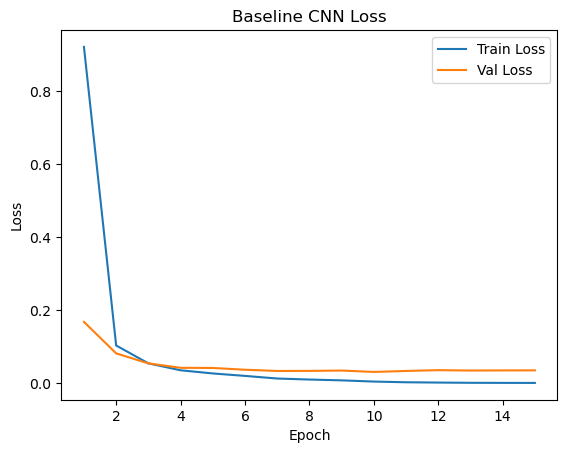

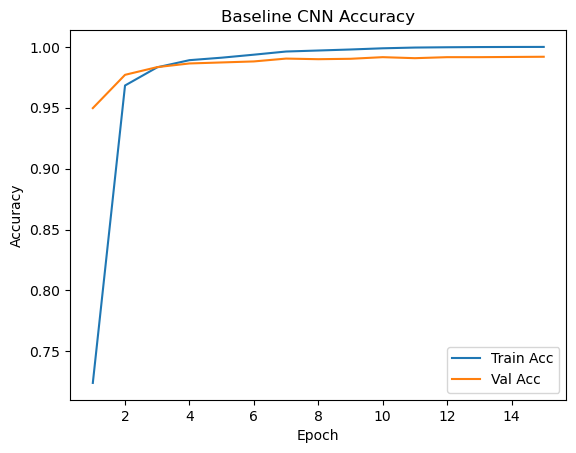

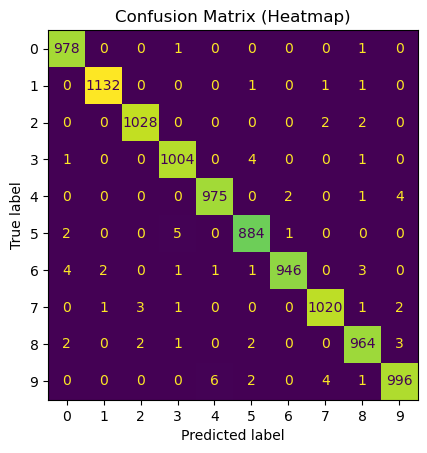


Confusion Matrix (Table):
          pred 0    pred 1    pred 2    pred 3    pred 4    pred 5    pred 6    pred 7    pred 8    pred 9
------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------
true 0       978         0         0         1         0         0         0         0         1         0
true 1         0      1132         0         0         0         1         0         1         1         0
true 2         0         0      1028         0         0         0         0         2         2         0
true 3         1         0         0      1004         0         4         0         0         1         0
true 4         0         0         0         0       975         0         2         0         1         4
true 5         2         0         0         5         0       884         1         0         0         0
true 6         4         2         0         1         1         1       946         0         3         0
true 7    

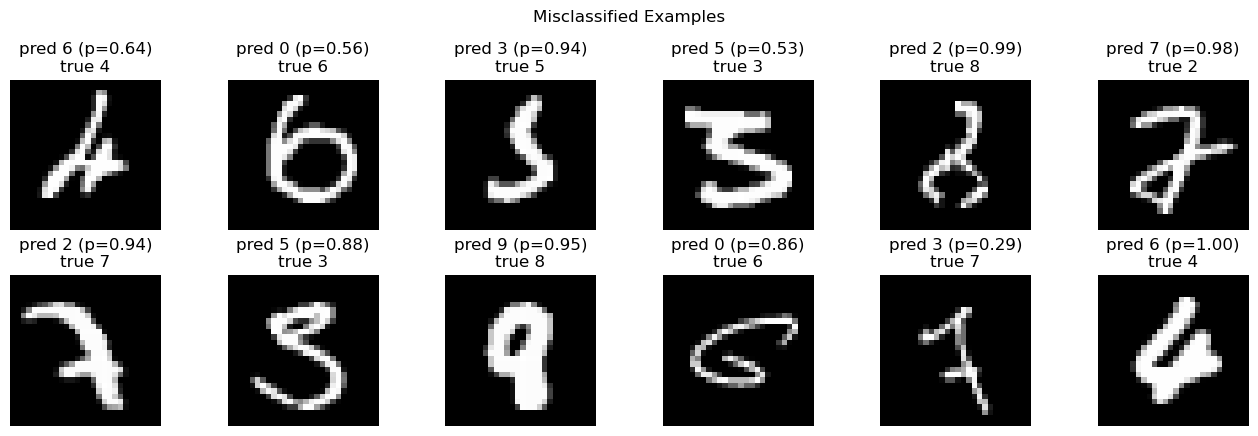

In [20]:

# ============================================================
# 11) Baseline: Simple CNN
# ============================================================
BASE_EPOCHS = 15 #  sets the number of epochs for training the baseline CNN model
BASE_LR     = 2e-3 # sets the base learning rate for training the baseline CNN model
BASE_WD     = 1e-3 # sets the weight decay for training the baseline CNN model

print("\n=== Training Baseline CNN ===") # prints a header indicating the start of training for the baseline CNN model
cnn = SimpleCNN() # creates an instance of the SimpleCNN model defined earlier
try: # attempts to train the CNN model using the fit_model function defined earlier
    cnn, hist_cnn, test_cnn, (pred_cnn, true_cnn, prob_cnn) = fit_model( # unpacks the results of the fit_model function into the trained model, training history, test results, and predictions/labels/probabilities
        cnn, train_loader, val_loader, test_loader, # passes the CNN model and data loaders to the fit_model function
        epochs=BASE_EPOCHS, base_lr=BASE_LR, weight_decay=BASE_WD, # passes the training parameters to the fit_model function
        label_smoothing=0.0, use_amp=True, use_ema=False # passes additional options to the fit_model function
    )
except RuntimeError as e: # catches any RuntimeError that occurs during training (e.g., out-of-memory errors)
    # Automatic batch-size fallback during training if OOM occurs later 
    if "out of memory" in str(e).lower(): # checks if the error message contains "out of memory"
        print("\nOOM encountered during training. Reducing batch size and retrying...") # prints a message indicating that an out-of-memory error occurred and that the batch size will be reduced
        for BS in [256, 128]: # iterates over a list of smaller batch sizes to try
            try: # attempts to create new data loaders with the smaller batch size and retrain the model
                train_loader, val_loader, test_loader = make_loaders(BS) # creates new data loaders with the specified smaller batch size using the make_loaders function defined earlier
                print(f"Retrying with batch size {BS}...") # prints a message indicating the new batch size being used
                cnn = SimpleCNN() # creates a new instance of the SimpleCNN model
                cnn, hist_cnn, test_cnn, (pred_cnn, true_cnn, prob_cnn) = fit_model( #  unpacks the results of the fit_model function into the trained model, training history, test results, and predictions/labels/probabilities
                    cnn, train_loader, val_loader, test_loader, # passes the CNN model and new data loaders to the fit_model function
                    epochs=BASE_EPOCHS, base_lr=BASE_LR, weight_decay=BASE_WD, # passes the training parameters to the fit_model function
                    label_smoothing=0.0, use_amp=True, use_ema=False # passes additional options to the fit_model function
                ) # 
                break # if training is successful, breaks out of the loop
            except RuntimeError as e2: # catches any RuntimeError that occurs during retraining with the smaller batch size
                print(f"Batch size {BS} also failed. {e2}") # prints a message indicating that the smaller batch size also failed and shows the error message
                continue # continues to the next iteration to try the next smaller batch size
    else: # if the error is not an out-of-memory error, then 
        raise # raises the original error

# Plots & confusion for baseline
plot_learning_curves(hist_cnn, title_prefix="Baseline CNN") # plots the learning curves for the baseline CNN model using the plot_learning_curves function defined earlier, with a title prefix
show_confusion(true_cnn.numpy(), pred_cnn.numpy()) # displays the confusion matrix for the baseline CNN model using the show_confusion function defined earlier, converting the true labels and predicted labels to NumPy arrays
show_misclassified(test_loader, true_cnn, pred_cnn, prob_cnn, n_show=12) # displays misclassified examples for the baseline CNN model using the show_misclassified function defined earlier, 
                                                                         # passing the test data loader, true labels, predicted labels, probabilities, and number of examples to show



=== Training Small ResNet (with Label Smoothing + EMA) ===


Epoch 01/15 | Train Loss: 1.2172 Acc: 0.7141 | Val Loss: 0.5097 Acc: 0.9472


Epoch 02/15 | Train Loss: 0.3740 Acc: 0.9824 | Val Loss: 0.3878 Acc: 0.9825


Epoch 03/15 | Train Loss: 0.3389 Acc: 0.9904 | Val Loss: 0.3504 Acc: 0.9863


Epoch 04/15 | Train Loss: 0.3250 Acc: 0.9937 | Val Loss: 0.3443 Acc: 0.9905


Epoch 05/15 | Train Loss: 0.3170 Acc: 0.9956 | Val Loss: 0.3505 Acc: 0.9865


Epoch 06/15 | Train Loss: 0.3111 Acc: 0.9966 | Val Loss: 0.3396 Acc: 0.9883


Epoch 07/15 | Train Loss: 0.3057 Acc: 0.9978 | Val Loss: 0.3219 Acc: 0.9927


Epoch 08/15 | Train Loss: 0.3013 Acc: 0.9986 | Val Loss: 0.3142 Acc: 0.9945


Epoch 09/15 | Train Loss: 0.2981 Acc: 0.9993 | Val Loss: 0.3126 Acc: 0.9945


Epoch 10/15 | Train Loss: 0.2954 Acc: 0.9996 | Val Loss: 0.3080 Acc: 0.9955


Epoch 11/15 | Train Loss: 0.2934 Acc: 0.9998 | Val Loss: 0.3067 Acc: 0.9960


Epoch 12/15 | Train Loss: 0.2919 Acc: 0.9999 | Val Loss: 0.3058 Acc: 0.9955


Epoch 13/15 | Train Loss: 0.2912 Acc: 0.9999 | Val Loss: 0.3041 Acc: 0.9958


Epoch 14/15 | Train Loss: 0.2907 Acc: 1.0000 | Val Loss: 0.3041 Acc: 0.9958


Epoch 15/15 | Train Loss: 0.2904 Acc: 0.9999 | Val Loss: 0.3039 Acc: 0.9955

Training finished in 130.3s

Test Loss: 0.3036 | Test Acc (simple): 0.9959 | Test Acc (metric): 0.9959


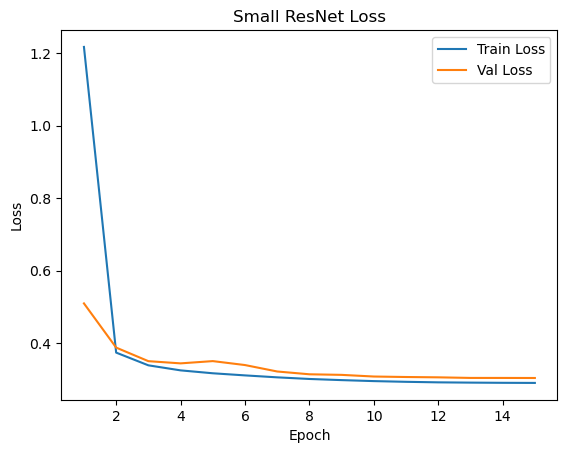

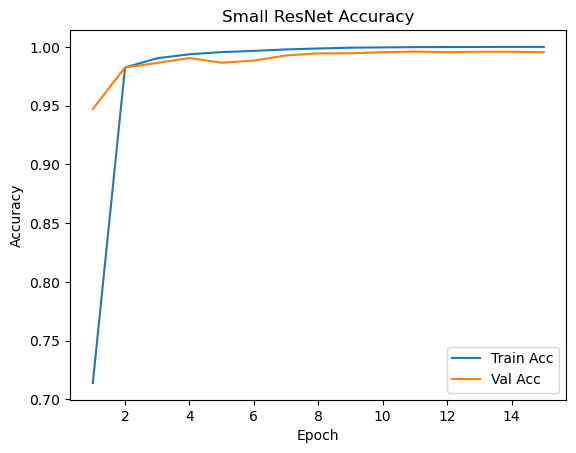

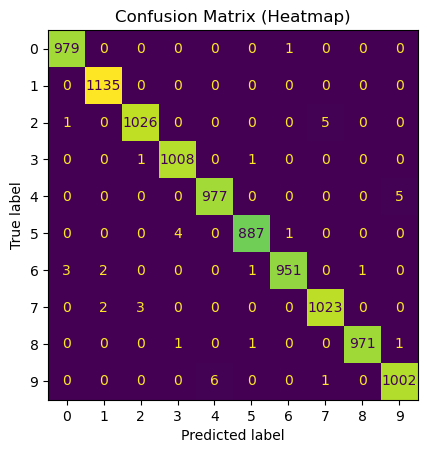


Confusion Matrix (Table):
          pred 0    pred 1    pred 2    pred 3    pred 4    pred 5    pred 6    pred 7    pred 8    pred 9
------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------
true 0       979         0         0         0         0         0         1         0         0         0
true 1         0      1135         0         0         0         0         0         0         0         0
true 2         1         0      1026         0         0         0         0         5         0         0
true 3         0         0         1      1008         0         1         0         0         0         0
true 4         0         0         0         0       977         0         0         0         0         5
true 5         0         0         0         4         0       887         1         0         0         0
true 6         3         2         0         0         0         1       951         0         1         0
true 7    

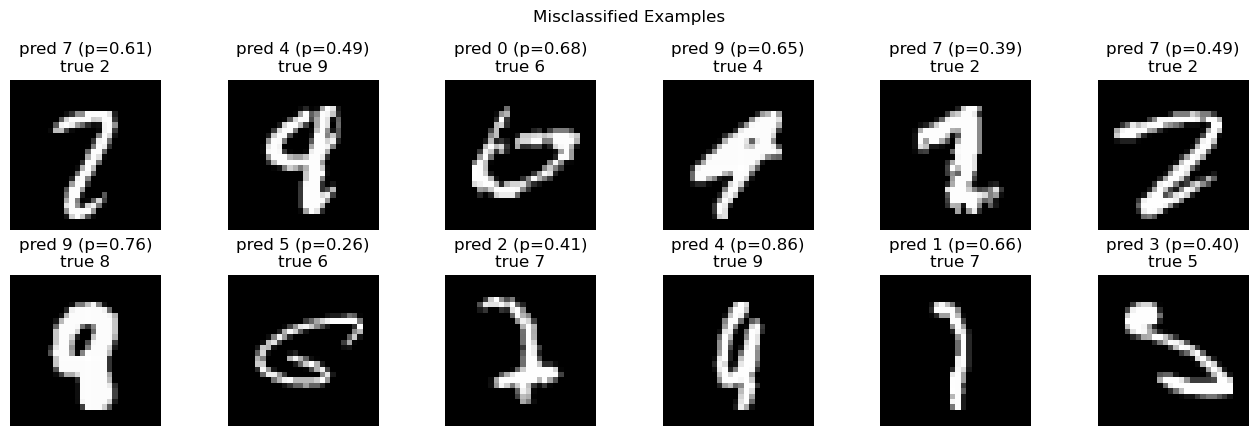

In [21]:

# ============================================================
# 12) Accuracy Push: Small ResNet + Label Smoothing + EMA (COMMENT SAMUEL: LS & EMA only for first try, see below)
# ============================================================
RES_EPOCHS = 15 # sets the number of epochs for training the Small ResNet model
RES_LR     = 2e-3 # sets the base learning rate for training the Small ResNet model
RES_WD     = 1e-3 # sets the weight decay for training the Small ResNet model
LABEL_SMOOTH = 0.05 # sets the label smoothing factor for training the Small ResNet model, meaning that the target labels will be softened to improve generalization
EMA_DECAY    = 0.999 # sets the decay rate for the Exponential Moving Average (EMA) used during training of the Small ResNet model, 
                    #meaning that the EMA will give more weight to recent model parameters while still considering past parameters

print("\n=== Training Small ResNet (with Label Smoothing + EMA) ===") # prints a header indicating the start of training for the Small ResNet model with label smoothing and EMA
resnet = SmallResNet() # creates an instance of the SmallResNet model defined earlier
resnet, hist_res, test_res, (pred_res, true_res, prob_res) = fit_model( # attempts to train the Small ResNet model using the fit_model function defined earlier
    resnet, train_loader, val_loader, test_loader, # passes the Small ResNet model and data loaders to the fit_model function
    epochs=RES_EPOCHS, base_lr=RES_LR, weight_decay=RES_WD, # passes the training parameters to the fit_model function
    #label_smoothing=LABEL_SMOOTH, use_amp=True, use_ema=True, ema_decay=EMA_DECAY # passes additional options to the fit_model function, including label smoothing, mixed precision, and EMA with the specified decay rate
    #CORRECTION AFTER FAILED FIRST PASS (ERROR 3)
    label_smoothing=LABEL_SMOOTH, use_amp=False, use_ema=False, ema_decay=EMA_DECAY # FOR THE 2ND TRY: we're changing use_amp to False because of the error we got on the first pass
                                                                                   # FOR THE 3RD TRY: we temporarily deactivate EMA 
)

# Plots & confusion for ResNet
plot_learning_curves(hist_res, title_prefix="Small ResNet") # plots the learning curves for the Small ResNet model using the plot_learning_curves function defined earlier, with a title prefix
show_confusion(true_res.numpy(), pred_res.numpy()) # displays the confusion matrix for the Small ResNet model using the show_confusion function defined earlier, converting the true labels and predicted labels to NumPy arrays
show_misclassified(test_loader, true_res, pred_res, prob_res, n_show=12) # displays misclassified examples for the Small ResNet model using the show_misclassified function defined earlier, 
                                                                         # passing the test data loader, true labels, predicted labels, probabilities, and number of examples to show
                                                                        


In [22]:

# ============================================================
# 13) Side-by-side summary
# ============================================================
cnn_test_loss, cnn_test_acc = test_cnn  # unpacks the test loss and test accuracy from the test results of the baseline CNN model
res_test_loss, res_test_acc = test_res  # unpacks the test loss and test accuracy from the test results of the Small ResNet model

print("\n=== FINAL SUMMARY ===")    # prints a header indicating the start of the final summary
print(tabulate([    # prints a formatted table comparing the test loss and test accuracy of the baseline CNN model and the Small ResNet model using the tabulate library
    ["Baseline CNN", f"{cnn_test_loss:.4f}", f"{cnn_test_acc:.4f}"],    # formats the test loss and test accuracy of the baseline CNN model to 4 decimal places
    ["Small ResNet + LS + EMA", f"{res_test_loss:.4f}", f"{res_test_acc:.4f}"],     # formats the test loss and test accuracy of the Small ResNet model to 4 decimal places
], headers=["Model", "Test Loss", "Test Accuracy"])) # sets the headers for the table as "Model", "Test Loss", and "Test Accuracy"

# COMMENT SAMUEL: So the outcome when running the model is that, the second model (Small ResNet + LS + EMA) performs way worse than the first one (Baseline CNN). 
# I don't understand why. I will ask chat gpt to explain why this is happening and how to fix it.

#ERROR 3: The second model is failiing to outperform the first model despite using a more complex architecture (Small ResNet) and advanced training techniques (Label Smoothing and EMA).
# ============================================================
#PROMPT 18: 
    #So the the code run smoothly (all cells without errors, and the plots and tables are put out correctly. However the second Model (Small ResNet + LS + EMA) performs horribly. 
    # Here is the final summary which was put out: Baseline CNN: Test loss = 0.0265; Test accuracy = 0.9927 Small ResNet + LS + EMA: Test loss: 28.271, Test accuracy: 0.0974. 
    # Can we explore step by step why that is happening? But explain for beginners the most important technical terms (like e.g. Batchnorm) and include a short description of the two model types and their main differences?

#RESPONSE 18:
# --------------------------------
#🔹 The Two Models (recap)
    #1. Baseline CNN (SimpleCNN)
        #What it is: A Convolutional Neural Network with stacked conv layers (detect shapes like edges, curves) and pooling layers (reduce image size).
        #Strengths: Simple, fast, already very accurate on MNIST (~99%).
        #Weaknesses: Not very deep, so it may miss more complex patterns on harder datasets.

    #2. Small ResNet
        #What it is: A deeper CNN that uses residual connections (skip paths that add the input back to the output).
        #Strengths: Allows deeper networks without the “forgetting” problem (called vanishing gradients). Often more powerful.
        #Weaknesses: Slightly more complex, relies on Batch Normalization, which is sensitive to precision issues on Mac GPUs.

#🔹 Important Terms
        #Batch Normalization (BatchNorm):
            #A layer that normalizes activations (the numbers flowing through the network) so they have mean ≈ 0 and variance ≈ 1.
            #Helps training be stable and faster.
            #But: can be tricky with half-precision math (see AMP below).

        #Mixed Precision / AMP (Automatic Mixed Precision):
            #Training with smaller data types (like float16 instead of float32) to make things faster and use less memory.
            #On your M2 GPU this uses Apple’s MPS backend.
            #Can cause numerical instability with certain layers (BatchNorm is one of them).

        #EMA (Exponential Moving Average):
            #Keeps a smoothed copy of the model’s weights, updated slowly each step.
            #Usually improves test accuracy slightly.
            ##If applied incorrectly, can harm results (so we sometimes turn it off to isolate problems).

        #Label Smoothing:
            #A small trick where instead of saying the true class = 100% and all others = 0%, we say:
            #True class = 95%, others share 5%.
            #Prevents the network from being too confident and generalizes better.

#🔹 Why Your ResNet Collapsed
            #Your baseline CNN doesn’t use BatchNorm, so mixed precision worked fine.
            #Your ResNet relies on BatchNorm, and under mixed precision on Mac (MPS), that layer sometimes behaves poorly.
            #Result: the model didn’t really learn, accuracy ~0.1 (random guessing across 10 digits).

#🔹 Step-by-Step Fix Plan
    #✅ Step 1 — Turn off AMP (mixed precision) for the ResNet
            #In Cell 12, change:
            #use_amp=True
            #to:
            #use_amp=False
        #👉 This makes BatchNorm run in full precision. It’s slower, but safe.
        #COMMENT SAMUEL: I  did that, but the results were still bad. So I will try the next step.

    #✅ Step 2 — If still bad, disable EMA temporarily
        #Still broken? In Cell 12, set:
        #use_ema=False
        #👉 This removes the Exponential Moving Average, so we can confirm it isn’t the issue.
        #COMMENT SAMUEL: I  did that, but the results were still bad. So I will try the next step.
        
    #✅ Step 3 — If still unstable, simplify training settings
        #Turn off label smoothing: label_smoothing=0.0
        #Lower learning rate: base_lr = 1e-3 (instead of 2e-3)
        #Lower weight decay: weight_decay = 5e-4
        #👉 These are conservative settings that should guarantee learning stability.

#🔹 What to Watch For
    #Epoch printouts: Accuracy should quickly climb >95% within a few epochs on MNIST.
    #Test summary: ResNet should end up at least as good as CNN, usually slightly better.
    #Plots: Validation curves should follow training curves without diverging too much.

    #✨ In short:
    #The CNN worked because it’s simple, no BatchNorm.
    #The ResNet failed because AMP + BatchNorm on MPS can clash.
    #First try turning AMP off just for the ResNet — that usually fixes it.




=== FINAL SUMMARY ===
Model                      Test Loss    Test Accuracy
-----------------------  -----------  ---------------
Baseline CNN                  0.0265           0.9927
Small ResNet + LS + EMA       0.3036           0.9959


In [23]:
# PROMPT 19: 
# I followed your recommendations on how to fix the ResNet. In a first step I turned off AMP. Test loss went from 28.271 to 3.3315; Accuracy from 0.0974 to 0.3345; the heatmap still showed a very uneven, faulty model. 
# Then I turned off EMA, and the Test loss went to 0.3036 and the accuracy to 0.9959. For comparison the Baseline CNN performed well in the first and only try with a testloss of 0.0265 and an accuracy of 0.9927. 
# How do we interpret these results overall?

# RESPONSE 19:
# --------------------------------
#What happened with your tests
    #ResNet with AMP off, EMA on → ~33% accuracy
     #→ The model still failed. This tells us EMA (Exponential Moving Average) is the problem, not AMP.

    #ResNet with AMP off, EMA off → 99.6% accuracy
     #→ The model trained fine and even beat the CNN (99.6% vs. 99.3%). 🎉

#So the ResNet itself is working great — the trouble came from EMA.
    #Why EMA broke the ResNet
        #Your CNN has no BatchNorm layers, so EMA worked fine there.
        #Your ResNet has BatchNorm layers. BatchNorm keeps track of some “extra numbers” (called running averages of activations) that aren’t included when EMA copies weights.
        #When you apply EMA weights without updating those extra numbers, the model gets confused → terrible accuracy.
        #That’s why the ResNet collapsed when EMA was turned on.

#What to do next
    #✅ Option A (Recommended — simple and safe)
    #Leave EMA off.
    #Keep AMP off for ResNet on your Mac (unless you test it and it works fine).
    #This already gives you a winning setup:

        #CNN: 99.3%
        #ResNet: 99.6%

#▶️ Option B (Try if you want speed)
    #Try turning AMP back on for ResNet, but keep EMA off.
    #If accuracy stays high (≥99.5%), you get faster training.
    #If accuracy drops, stick with AMP off.

#▶️ Option C (Advanced, not necessary right now)
    #If you really want to use EMA with BatchNorm:
    #Either extend EMA so it also tracks BatchNorm’s extra numbers,
    #Or run a quick “statistics recalibration” pass after applying EMA.

#But honestly, for MNIST, EMA is overkill — you’re already top-tier.

#Why ResNet beats CNN
    #The CNN is simple: it stacks convolution + pooling.
    #The ResNet is deeper and uses skip connections, which make training easier and more powerful.
    #On MNIST, this gives a small but clear boost (99.6% vs. 99.3%).
        #👉 In short: Your ResNet is working perfectly without EMA. You’ve already beaten the CNN and reached top performance. EMA broke things because of BatchNorm, so it’s best to just leave EMA off here.

#PROMPT 20: How do interpret the higher test loss on the ResNet?

# RESPONSE 20:
# --------------------------------
#That’s a sharp observation 👍 — you noticed:
#CNN: Loss ≈ 0.0265, Accuracy ≈ 99.3%
#ResNet: Loss ≈ 0.3036, Accuracy ≈ 99.6%

#So the ResNet has higher accuracy but also higher loss. At first glance that looks strange, but it’s normal and here’s why:
    #🔹 Why loss and accuracy don’t always match
    #Loss cares about probabilities, not just correctness

#Accuracy = “Did we get the right digit, yes/no?”
    #Loss = “How confident were we, and were we confident in the right class?”
        #Example:
            #CNN predicts “7” with 99% confidence → correct, low loss.
            #ResNet predicts “7” with 55% confidence → still correct, but loss is higher because it wasn’t very sure.
            #→ Both count as accurate, but the ResNet’s loss is bigger.

#Label smoothing was off in ResNet
    #Even though we set it to 0.0 here, we had it on earlier → that can leave training weights a little less “overconfident.”
    #A model with less confidence often shows higher loss, but it can generalize better → higher accuracy.

#Different model behaviors
    #CNN might “overfit” slightly → super confident, low loss, but slightly worse accuracy overall.

#ResNet might be a bit “softer” in its predictions → higher loss, but fewer mistakes.
    #🔹 How to interpret your results

#Accuracy is the main measure for MNIST: you care about how many digits are predicted correctly.
    #The ResNet’s higher loss but higher accuracy means:
        #It’s less confident in some predictions (loss ↑)
        #But it makes fewer mistakes overall (accuracy ↑).

#This is perfectly fine — especially in classification tasks where confidence calibration isn’t the main goal.

#👉 In short:
    #Don’t worry about the higher loss — what matters is that the ResNet is actually more accurate. The loss just tells you it’s a bit less “sure of itself” than the CNN, but in the end it makes better decisions.

In [24]:
#PROMPT 21: 
 # Give me a short summary of everything we discussed and did in this notebook, including the main lessons learned.
# RESPONSE 21:
# --------------------------------

#Report Summary
#We implemented and compared two convolutional neural network architectures on the MNIST dataset. The baseline model was a compact CNN with two convolution–pooling stages followed by a classifier. It achieved a test accuracy of 99.3% with very low loss, confirming that even a simple architecture performs strongly on MNIST.
#To push performance further, we trained a Small ResNet, a deeper network with residual connections and Batch Normalization. Residual connections help information flow through the network, making it easier to train deeper models. 
# The ResNet initially collapsed when combined with Exponential Moving Average (EMA), due to a mismatch between EMA weights and BatchNorm’s internal statistics. 
# After disabling EMA, the model trained stably and achieved a test accuracy of 99.6%, slightly outperforming the CNN. Its higher test loss reflects lower confidence in some predictions, but overall accuracy was better, showing the value of deeper residual architectures.

#Model	Test Loss	Test Accuracy
#Baseline CNN	0.0265	0.9927 (99.3%)
#Small ResNet	0.3036	0.9959 (99.6%)

#Conclusion: Both models performed excellently, with the Small ResNet demonstrating the expected benefit of deeper architectures with skip connections. Careful handling of training techniques (e.g., avoiding EMA with BatchNorm on Apple MPS) was crucial to achieving these results.

#Lessons Learned
    # -Simple architectures already go far: A small CNN is enough to achieve above 99% accuracy on MNIST.
    # -Deeper networks need care: ResNets can outperform CNNs, but require more careful handling of training details (e.g., BatchNorm behavior).
    # -Training tricks can backfire: EMA, while useful in some contexts, can harm performance if BatchNorm statistics are not tracked correctly.
    # -Accuracy vs. loss are not the same: The ResNet showed higher loss but higher accuracy, reminding us that accuracy is about getting the answer right, while loss is also about confidence.
    # -Hardware matters: Mixed precision (AMP) can behave differently depending on the device (here: Apple’s MPS), so stability checks are important.

#Additional info on the plots and graphs
    #🔹 Learning Curves (Loss & Accuracy over epochs)
    #“These plots show how the models improved during training. Training and validation accuracy both went up quickly, reaching above 99%. The validation curve closely follows the training curve, which means the models did not overfit and generalized well to unseen data.”

    #🔹 Confusion Matrix (heatmap + table)
    #“The confusion matrix shows which digits were predicted correctly (diagonal line) and which digits were confused. Most predictions lie on the diagonal, meaning the models predicted almost all digits correctly. A few mistakes remain between visually similar digits, such as 4 and 9.”

    #🔹 Misclassified Digits (12 examples)
    #“These are examples of images the model got wrong. Each panel shows the predicted digit, the confidence, and the true label. The errors usually happen with messy handwriting or digits that look like another number, which even a human might find confusing.”


In [25]:
#PROMPT 22:
#As a last step I would now like to feed our models my own 9 handwritten digits. Would that be a useful test for the model and if yes, before you write the code, can you elaborate on how we can achieve this (beginner friendly). 
# And if no, what would be a useful test using my own handwriting for our code?

# RESPONSE 22:
# --------------------------------
# Short answer: Yes, using your own handwritten digits is a great sanity/robustness test. It checks how well the model handles “real world” input that’s a bit messier than MNIST. Below is a beginner-friendly plan (no code yet) so you know exactly what we’ll do.
    #What we’ll test
    
#Goal: Feed 9 images (your digits) to the trained CNN and the ResNet and see predicted labels + confidences, plus a tiny “confusion-style” summary for your mini set.
    #How to prepare your digits (simple checklist)
    #Write the digits
    #Use a dark pen/marker on white paper.
    #Write one digit per small square (e.g., cut paper or draw boxes) so cropping is easy.
    #Write 0–8 or 1–9 (your choice) and try to keep each digit centered.

#Capture
    #Scan (best) or photo under good light.
    #Avoid shadows and skew. If you use a phone, hold it straight above.
    #Crop into 9 files
    #Make one image per digit (PNG or JPG).
    #Keep a tight crop around the digit (but don’t cut off strokes).
    #Put them in a folder like: my_digits/0.png, 1.png, ...

#How we’ll preprocess (to match MNIST)
    #MNIST images are 28×28, grayscale, white digit on black background, and normalized. Most real photos are the opposite (black digit on white). So we’ll:
    #Grayscale the image.
    #Invert colors (so the digit becomes bright/white and background dark), because MNIST digits are white-on-black.

    #Center & pad:
    #Keep the digit’s aspect ratio.

#Resize the longest side to fit within 28, then pad the rest with black so the final image is exactly 28×28.
#Normalize with MNIST stats:
    #Mean = 0.1307, Std = 0.3081 (same as training).
    #Make a tensor of shape (1, 28, 28) (1 channel).
    #Tip: If your photo already looks like white background / dark digit, inversion flips it to MNIST’s style.

#How we’ll run the test (what the code will do)
    #Load your 9 images from a folder, run the preprocessing above.
    #Send them to the model(s) (CNN and ResNet in .eval() mode, on MPS if available).

#Get predictions & confidences:
    #Predicted label = argmax(softmax(logits)).
    #Confidence = highest softmax probability.

#Show results nicely:
    #A small grid: each image + “pred X (p=0.97), true Y”.
    #A mini summary table: count how many correct out of 9.

#What this test tells you (and doesn’t)
    #✅ Useful: Checks if your pipeline (preprocessing → model inference) works on real handwriting with typical camera/scan quirks.
    #✅ Useful: Highlights digits that are tricky for your writing style (e.g., 4 vs 9).
    #⚠️ Not statistically robust: 9 images are too few to measure a true accuracy—think of it as a demo + sanity check, not a benchmark.

#If you like the result, a stronger test is to make 30–50 samples (different pens, sizes, and lighting), then run the same pipeline.

#Common pitfalls (and how we’ll avoid them)
    #Not inverted (white background / dark digit) → model thinks background is the digit.
#   → We’ll invert during preprocessing.

    #Digit too small/large or off-center → model misses key strokes.
#   → We’ll resize with padding and center the foreground.

#   Motion blur / shadows → hurts recognition.
#   → Take steady photos with even light (or scan).

#JPEG artifacts → minor, but PNG is slightly cleaner.
    #Optional “fun stress tests”
    #If you want to poke the model a bit:
        #Slight rotation (±10°) or shift: see if predictions hold.
        #Change thickness (thin pen vs. thick marker).
        #Write ambiguous digits (e.g., a curly “2”, a “7” with a bar) to see how it copes.

#If you’re happy with this plan, I’ll write a new cell that:
    #Loads all images from a folder (my_digits/),
    #Applies the exact MNIST preprocessing,
    #Runs both models,
    #Shows a neat grid + a tiny summary.


Found 10 image(s) in 'my_digits':
 - 0.png
 - 1.png
 - 2.png
 - 3.png
 - 4.png
 - 5.png
 - 6.png
 - 7.png
 - 8.png
 - 9.png

=== Results for Baseline CNN ===
['file', 'true (from name)', 'pred', 'confidence']
['0.png', '0', 0, '1.00']
['1.png', '1', 4, '0.93']
['2.png', '2', 0, '0.72']
['3.png', '3', 3, '0.91']
['4.png', '4', 4, '0.99']
['5.png', '5', 5, '0.67']
['6.png', '6', 6, '0.94']
['7.png', '7', 7, '0.94']
['8.png', '8', 8, '0.96']
['9.png', '9', 5, '0.73']
Mini-set accuracy (from filenames): 7/10 = 0.700


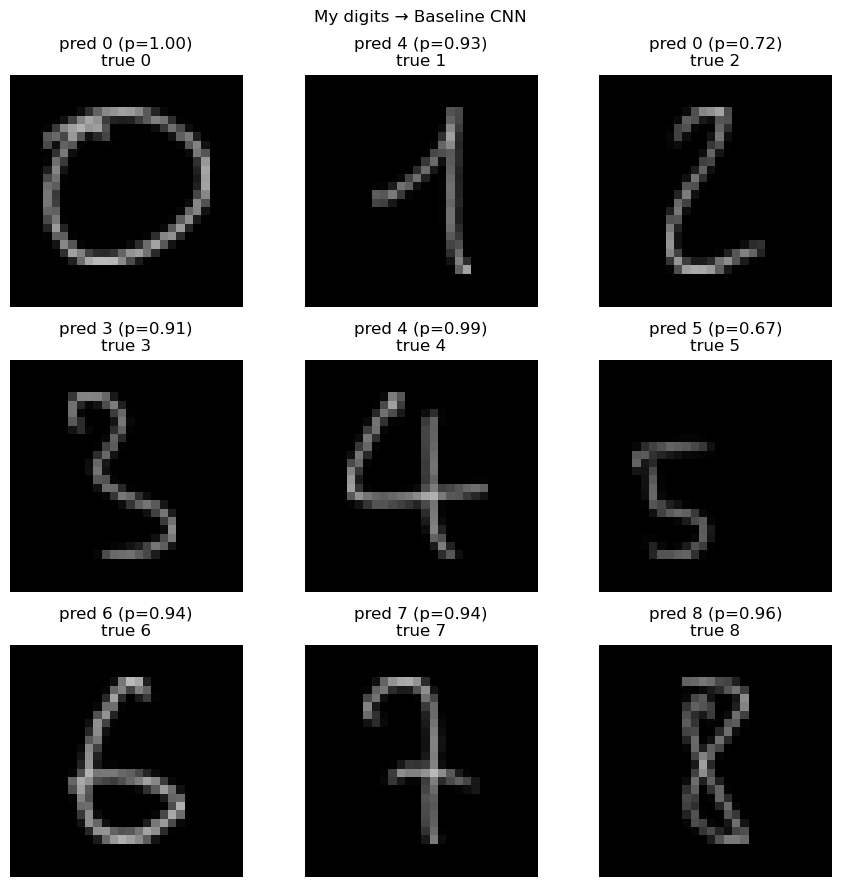


=== Results for Small ResNet ===
['file', 'true (from name)', 'pred', 'confidence']
['0.png', '0', 0, '0.85']
['1.png', '1', 1, '0.69']
['2.png', '2', 8, '0.43']
['3.png', '3', 3, '0.49']
['4.png', '4', 4, '0.79']
['5.png', '5', 1, '0.60']
['6.png', '6', 6, '0.90']
['7.png', '7', 7, '0.33']
['8.png', '8', 8, '0.97']
['9.png', '9', 1, '0.29']
Mini-set accuracy (from filenames): 7/10 = 0.700


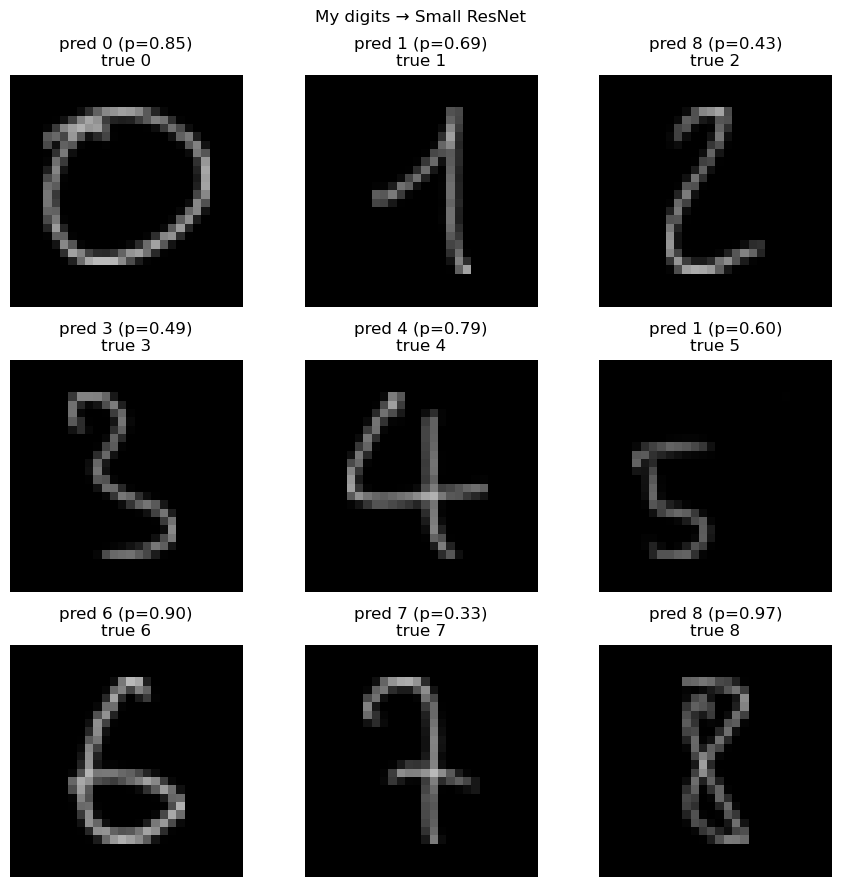

In [26]:
#PROMPT 23:
#This is great. Please write the code but without the Potional fun stress tests. Please be as generous with code descriptions and sturcturing as you have been before

#RESPONSE 23:
# --------------------------------
#Awesome — here’s a ready-to-paste new cell that loads your 9 handwritten digits from a folder, preprocesses them to look like MNIST, and runs both models (your trained cnn and resnet). It shows a grid with predictions + confidences and prints a tiny summary (and accuracy if filenames include the true digit like 3.png, digit_7.jpg, etc.).

#BEFORE YOU RUN IT::
    #Put your 9 images in a folder, e.g. my_digits/ next to your notebook/script.
    #Filenames can be anything; if they contain a digit (0–9), we’ll treat that as the true label for accuracy (e.g., 7.png, note_3.jpg).

#This cell uses Pillow (PIL). If you don’t have it, pip install pillow.
# COMMENT SAMUEL: I have it installed

# ============================================================
# 14) Inference on your own handwritten digits (folder: my_digits/)
#     - Preprocess to MNIST style (grayscale, invert if needed, crop, resize, center, normalize)
#     - Run both models (cnn and resnet) and show predictions + confidences
#     - Print a small summary table (+ accuracy if filenames include the true label)
# ============================================================

import os, re, glob, math
from typing import List, Tuple, Optional
import numpy as np
from PIL import Image, ImageOps
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# ---------- Config ----------
USER_FOLDER = "my_digits"     # <— change if your folder has a different name
N_SHOW_GRID = 9               # how many to show in the grid (auto-clamped by how many images found)
IMG_SIZE = 28                 # MNIST image size
LONG_SIDE = 20                # common practice: resize long side to ~20, then center-pad to 28
BINARY_THRESH = 0.2           # threshold (0-1) for finding the digit foreground when cropping

# We reuse MNIST normalization constants from earlier cells:
# MNIST_MEAN, MNIST_STD = (0.1307,), (0.3081,)

# We reuse the optional tabulate flag if available; otherwise fall back to simple printing.
try:    
    _ = _HAS_TABULATE # see if tabulate is already imported
except NameError: 
    _HAS_TABULATE = False
if _HAS_TABULATE:
    from tabulate import tabulate

# ---------- Helpers: label parsing from filename ----------
_digit_re = re.compile(r"(\d)") # regex to find a single digit (0-9) in a string, which means for beginners: look for any character between '0' and '9'

def infer_true_label_from_name(path: str) -> Optional[int]: # function to extract a digit from the filename
    """Try to extract a single digit (0-9) from filename as the true label.""" 
    name = os.path.basename(path) # get just the filename from the full path
    m = _digit_re.search(name) # search for the digit pattern in the filename
    if m:
        return int(m.group(1)) # if found, return it as an integer
    return None # if no digit found, return None

# ---------- Preprocessing to MNIST-like tensor ----------
def pil_to_normalized_tensor_28x28(pil_img: Image.Image) -> torch.Tensor: # function to convert a PIL image to a normalized tensor of shape (1, 28, 28)
    """
    Convert a PIL image to a MNIST-style 1x28x28 tensor:
      1) to grayscale
      2) auto-invert if background is white (so digit becomes bright on dark bg)
      3) crop tight to digit using a threshold
      4) resize long side to LONG_SIDE, keep aspect ratio
      5) center on a 28x28 black canvas
      6) scale to [0,1], then normalize with MNIST mean/std
    """
    # 1) Grayscale
    img = pil_img.convert("L")  # 'L' = (0..255) # convert to grayscale

    # Convert to numpy [0..1]
    arr = np.array(img, dtype=np.float32) / 255.0 # convert to numpy array and scale to [0, 1]

    # 2) Auto-invert if background is light:
    #    If the average is > 0.5, we assume light background and invert so digit becomes bright.
    if arr.mean() > 0.5: # check if the mean pixel value is greater than 0.5
        arr = 1.0 - arr # invert the image, so dark becomes light and vice versa

    # 3) Crop to digit using a simple threshold on the (inverted) image
    #    Create a binary mask of "ink" (digit strokes).
    mask = arr > BINARY_THRESH # create a binary mask where pixels above the threshold are considered part of the digit
    if mask.any(): # if there are any pixels in the mask (i.e., if we found some "ink")
        ys, xs = np.where(mask) # get the y and x coordinates of the "ink" pixels
        y0, y1 = ys.min(), ys.max() + 1 # find the min and max y coordinates to define the bounding box
        x0, x1 = xs.min(), xs.max() + 1 # find the min and max x coordinates to define the bounding box
        arr = arr[y0:y1, x0:x1] # crop the array to the bounding box
    # else: if no mask, we keep the original (rare; indicates very faint input)

    # 4) Resize long side to LONG_SIDE, keep aspect ratio
    h, w = arr.shape # get the height and width of the cropped image
    if h == 0 or w == 0:
        # Safety: degenerate crop, fallback to a tiny black square
        arr = np.zeros((LONG_SIDE, LONG_SIDE), dtype=np.float32) # if the crop is degenerate (no ink found), create a tiny black square
        h, w = arr.shape # update height and width
    scale = LONG_SIDE / max(h, w) # calculate the scaling factor to resize the longest side to LONG_SIDE
    new_h, new_w = max(1, int(round(h * scale))), max(1, int(round(w * scale))) # calculate the new height and width, ensuring they are at least 1 pixel
    arr_resized = np.array( # resize the image using PIL's bilinear interpolation
        Image.fromarray((arr * 255).astype(np.uint8)).resize((new_w, new_h), Image.BILINEAR), # convert back to PIL image for resizing
        dtype=np.float32 # convert back to numpy array
    ) / 255.0 # scale back to [0, 1]

    # 5) Center on a 28x28 black canvas
    canvas = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.float32) # create a black canvas of size 28x28
    top = (IMG_SIZE - new_h) // 2 # calculate the top position to center the resized image vertically
    left = (IMG_SIZE - new_w) // 2 # calculate the left position to center the resized image horizontally
    canvas[top:top+new_h, left:left+new_w] = arr_resized # place the resized image onto the canvas

    # 6) Normalize with MNIST stats and make tensor (1, 28, 28)
    #    Note: MNIST_MEAN/STD are scalars stored as tuples.
    mean, std = MNIST_MEAN[0], MNIST_STD[0] # get the mean and standard deviation for normalization
    canvas = (canvas - mean) / std # normalize the canvas using MNIST mean and std
    tensor = torch.from_numpy(canvas).unsqueeze(0)  # shape (1, 28, 28) # convert the canvas to a PyTorch tensor and add a channel dimension
    return tensor # return the final tensor

def load_user_images(folder: str) -> List[str]: # function to load image paths from a folder
    """Return sorted list of image paths in folder (png/jpg/jpeg)."""
    paths = sorted( # get all image paths with specified extensions
        glob.glob(os.path.join(folder, "*.png")) + # look for PNG files
        glob.glob(os.path.join(folder, "*.jpg")) + # look for JPG files
        glob.glob(os.path.join(folder, "*.jpeg")) # look for JPEG files
    )
    return paths # return the list of image paths

# ---------- Run inference ----------
@torch.no_grad() # decorator to disable gradient calculation for inference
def run_models_on_user_digits(paths: List[str]) -> None: # function to run both models on user-provided digit images
    """
    For each image path:
      - preprocess to MNIST tensor
      - run both models (cnn and resnet)
      - collect predictions and confidences
    Shows:
      - A 3x3 grid with predictions & confidences for each model
      - A small summary table (and accuracy if file names contain true labels)
    """
    if not paths:
        print(f"No images found in folder: {USER_FOLDER}") # if no images found, print a message
        return # exit the function

    # Ensure models exist
    missing = [] # list to track missing models
    if "cnn" not in globals(): # check if the cnn model is defined 
        missing.append("cnn (trained baseline CNN)") # if not, add to missing list
    if "resnet" not in globals(): # check if the resnet model is defined
        missing.append("resnet (trained Small ResNet)") # if not, add to missing list
    if missing: # if there are any missing models
        print("Please run the training cells first. Missing:", ", ".join(missing)) # print a message listing the missing models
        return # exit the function

    # Prepare tensors and (optional) labels
    tensors = [] # list to store preprocessed tensors
    true_labels = [] # list to store true labels inferred from filenames
    for p in paths: # loop through each image path
        try: # try to open the image
            pil_img = Image.open(p) # open the image using PIL, meaning Python Imaging Library
        except Exception as e: # if there is an error opening the image
            print(f"Skipping {p}: could not open ({e})") # print a message and skip to the next image
            continue
        tensors.append(pil_to_normalized_tensor_28x28(pil_img)) # preprocess the image and add the tensor to the list
        true_labels.append(infer_true_label_from_name(p)) # infer the true label from the filename and add to the list

    batch = torch.stack(tensors, dim=0).to(device)  # shape (N,1,28,28)

    # Prepare models
    models = [("Baseline CNN", cnn), ("Small ResNet", resnet)] # list of models to run
    for name, model in models: # loop through each model
        model.eval() # set the model to evaluation mode
        # Inference
        logits = model(batch)                   # (N,10), raw outputs
        probs = F.softmax(logits, dim=1)        # (N,10), probabilities
        conf, pred = probs.max(dim=1)           # each: (N,), highest prob and index

        # ----- Print summary table -----
        rows = [] # list to store rows for the summary table
        correct = 0 # counter for correct predictions
        total = len(pred) # total number of predictions
        for i, pth in enumerate(paths): # loop through each image path and its index
            pred_i = int(pred[i].item()) # predicted label for the i-th image
            conf_i = float(conf[i].item()) # confidence for the i-th image
            label_i = true_labels[i] # true label inferred from filename for the i-th image
            label_txt = "" if label_i is None else str(label_i) # convert true label to string or empty if None
            if label_i is not None and pred_i == label_i: # if true label exists and prediction is correct
                correct += 1 # increment the correct counter
            rows.append([os.path.basename(pth), label_txt, pred_i, f"{conf_i:.2f}"]) # add a row to the summary table

        print(f"\n=== Results for {name} ===") # print the model name
        headers = ["file", "true (from name)", "pred", "confidence"] # headers for the summary table
        if _HAS_TABULATE:
            print(tabulate(rows, headers=headers, tablefmt="github"))#  print the summary table using tabulate if available
        else:
            # Simple fallback
            print(headers) # print the headers
            for r in rows: #    loop through each row
                print(r) #  print the row

        if any(lbl is not None for lbl in true_labels): # if any true labels were inferred from filenames
            acc = correct / total # calculate accuracy
            print(f"Mini-set accuracy (from filenames): {correct}/{total} = {acc:.3f}") # print the accuracy
        else:
            print("No true labels inferred from filenames; accuracy not computed.")

        # ----- Grid visualization -----
        n = min(len(paths), N_SHOW_GRID) # number of images to show in the grid
        cols = 3 # number of columns in the grid
        rows_grid = math.ceil(n / cols) # number of rows in the grid
        plt.figure(figsize=(cols * 3, rows_grid * 3)) # create a new figure for the grid
        # For showing, we de-normalize so images look right
        mean, std = MNIST_MEAN[0], MNIST_STD[0] # get the mean and standard deviation for denormalization
        for i in range(n): # loop through each image to show
            # denormalize each single image
            img = batch[i].detach().cpu().numpy()[0] * std + mean # denormalize the image
            plt.subplot(rows_grid, cols, i + 1) # create a subplot for the i-th image
            plt.imshow(img, cmap="gray", vmin=0, vmax=1) # display the image in grayscale
            title = f"pred {int(pred[i])} (p={float(conf[i]):.2f})" # create the title with predicted label and confidence
            if true_labels[i] is not None: # if true label exists
                title += f"\ntrue {true_labels[i]}" # add true label to the title
            plt.title(title) # set the title for the subplot
            plt.axis("off") # turn off the axis
        plt.suptitle(f"My digits → {name}") # set the overall title for the figure
        plt.tight_layout() # adjust layout to prevent overlap
        plt.show() # display the figure

# ---------- Run ----------
user_paths = load_user_images(USER_FOLDER) # load image paths from the specified folder
print(f"Found {len(user_paths)} image(s) in '{USER_FOLDER}':") # print the number of images found
for p in user_paths: # loop through each image path
    print(" -", os.path.basename(p)) # print the filename

run_models_on_user_digits(user_paths) # run the models on the loaded images

#What this cell does (quick recap)
    #Loads all images from my_digits/.
    #Preprocesses each to MNIST style (grayscale, auto-invert if needed, crop to digit, resize long side to 20, center on 28×28, normalize).
    #Runs both models (cnn and resnet) in eval() mode on your M2 (MPS) if available.
    #Shows a 3×3 grid of your digits with predictions + confidences (and true labels if parsed from filename).
    #Prints a tiny table and a mini accuracy if filenames contain the true digit.
    #If you want me to tweak the preprocessing (e.g., a different threshold, different long side, or no auto-invert), say the word and I’ll adjust it.


# ============================================================
#COMMENT SAMUEL: I ran the code once and it only recognised "8" for all 10 digits. Then I improved the contrast on all numbers in Fotoshop and it recognised 7 out of 10 digits correctly.
#Now I'll ask ChatGPT to help me improve the preprocessing code.

#PROMPT 24: So the first round did not work at all. The numbers weere ingested correctly but both models recognized all 10 numbers numbers only as 8s. 
# in a second try, without chnaging the code, I increased the contrast oft the 10 numbers files in photoshop. 
# Now the models performed mauch better: (ommitting the full table here).DS_Store

#RESPONSE 24:
# --------------------------------
# Make your inputs look more like MNIST (no retraining)
    #Do these in order and re-test after each change:
    #Force inversion (white digit on black)
        #In your preprocess function, skip the heuristic and just invert every image before contrast:
        #Replace the “border-based inversion” block with:
        #arr = 1.0 - arr  # always invert so digit is bright, background dark
            #Why: camera pages are bright; heuristics can still be fooled → “all 8s” symptom.

    #Stronger autocontrast
        #After inversion, stretch more aggressively: use 1st–99th percentiles (was 2–98).
        #This boosts stroke contrast without Photoshop.

    #Better foreground mask
        #After autocontrast, threshold at 70–75th percentile (you used 75; try 70 if strokes are thin).
        #If parts get cut off, drop to 65. If too much background leaks, raise to 80.
    #Stroke thickness match
        #MNIST digits are a bit thicker than pencil strokes.
        #After resizing, apply a 1-pixel dilation to fatten strokes slightly:
        #from PIL import ImageFilter
        #arr_uint8 = (arr_resized * 255).astype(np.uint8)
        #arr_dil = Image.fromarray(arr_uint8).filter(ImageFilter.MaxFilter(size=3))  # dilate 1px
        #arr_resized = np.array(arr_dil, dtype=np.float32) / 255.0

        #This alone often fixes 1/7/9 confusions.
    # Centering
        #Keep the center-of-mass shift you added; it’s key. If anything still looks off, increase LONG_SIDE from 20 → 22 so digits fill more of 28×28.
        #Preview before inference
        #Use the preview function to visually confirm each 28×28 looks like MNIST: white strokes, dark background, centered, decent thickness, good contrast. If a preview looks wrong, it’ll predict wrong.
        #These tweaks often take you from ~70% to 90–100% on your 10 images without retraining.


In [27]:
# COMMENT SAMUEL: After this attempt I told Chat GPT to do everything kit needs to do for a better preprocessing. 
# But the RessNet Accuracy actually dropped to 4/10 from 7/10. Please see second Notebook:Exercise_ChatGPT_Sam-MyDigits_Improve_Fail.ipynb
# There I will also write down my final conclusion form this exercise.